# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
Los datos que podrian aportar son los siguientes : fecha de construccion, precio original si, es una propiedad que se vende por segunda vez. Dimensiones del apartamento, numero de cuartos, numero de baños, tipo de cocina, clase de lujos como piscina, jacuzzi, sala de juegos. Si tiene parqueadero, la ubicacion, el barrio, la ciudad, el estrato, un acceso facil a un transporte publico, centro comercial cerca(este tipo de construcciones valoran a los departamentos en caso de que no existeran cuando se inicio la edificacion).
Todas estas variables son importantes ya que afectan indirectamente el valor del precio en un tipo de propiedad al tratar de predesirce, lo cual llevaria a obtener un porcentaje de error diferente al no tener en cuenta varias de ellas, convirtiendolo un problema mas ideal.

<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
from google.colab import drive 
drive.mount('/content/driven/')

Mounted at /content/driven/


In [ ]:
Departamento = pd.read_csv('/content/driven/MyDrive/Colab Notebooks/datasets/datset apartamentos/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
Departamento.head(5)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 6.5MB 11.8MB/s 
     |████████████████████████████████| 15.3MB 268kB/s 


### ***Creamos un data de Geopandas***

para observar y entender donde se localiza la obtencion del dataset, se realiza un mapa geografico

In [ ]:
# Cargar la capa temática
import geopandas as gpd
import matplotlib.pyplot as plt
df_geo  = gpd.GeoDataFrame(Departamento, geometry=gpd.points_from_xy(Departamento.lon, Departamento.lat))
df_geo.head(2)

start_date    end_date  ... operation_type                     geometry
0  2019-10-17  2019-12-23  ...          Venta  POINT (-58.38495 -34.60588)
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)

[2 rows x 20 columns]

In [ ]:
#eliminamos los datos NaN
df_geo = df_geo.dropna()


In [ ]:
df_geo.isnull()

start_date  end_date  ...  operation_type  geometry
0            False     False  ...           False     False
1            False     False  ...           False     False
2            False     False  ...           False     False
3            False     False  ...           False     False
4            False     False  ...           False     False
...            ...       ...  ...             ...       ...
146655       False     False  ...           False     False
146656       False     False  ...           False     False
146657       False     False  ...           False     False
146658       False     False  ...           False     False
146659       False     False  ...           False     False

[114488 rows x 20 columns]

In [ ]:
#renombramos el dataset geopandas
df_geo1  = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo.lon, df_geo.lat))
df_geo1.head(2)

start_date    end_date  ... operation_type                     geometry
0  2019-10-17  2019-12-23  ...          Venta  POINT (-58.38495 -34.60588)
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)

[2 rows x 20 columns]

In [ ]:
#creamos el mapa del mundo 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1080x1080 with 0 Axes>

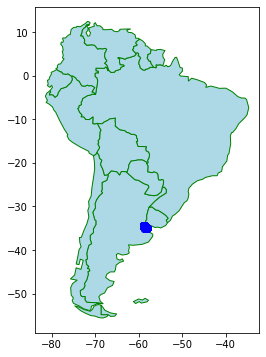

In [ ]:
#mapa geografico usando las latitud y longitud 
import matplotlib
plt.figure(figsize=(15,15))
axis = world[world.continent == 'South America'].plot(
 color = 'lightblue', edgecolor = 'green')
df_geo1.plot(ax = axis, color = 'blue')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,6)
plt.show()

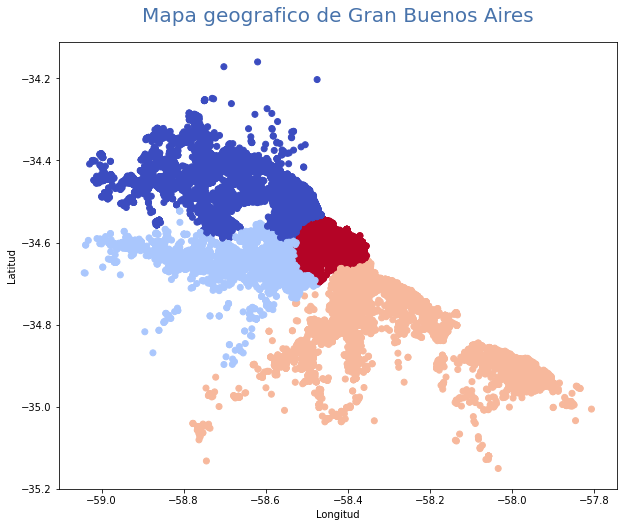

In [ ]:
#dandole un zoom al mapa anterior verificamos con mas precision en que parte de argentina vamos a trabajar,
# graficamos un mapa geografico


# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Mapa geografico de Gran Buenos Aires', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

 
# Mostrar el mapa finalizado
df_geo1.plot(column='l2', cmap='coolwarm', ax=ax, zorder=0)




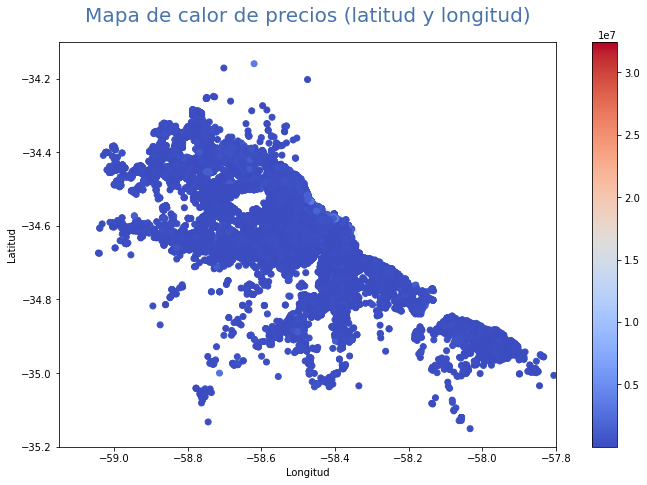

In [ ]:
#graficamos un mapa de calor de precios en funcion a las localidades


# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-59.15, -57.8, -35.2, -34.1])
 
# Control del título y los ejes
ax.set_title('Mapa de calor de precios (latitud y longitud)', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
 
# Generar y cargar el mapa
df_geo1.plot(column='price', cmap='coolwarm', ax=ax,
              legend=True, cax=cax, zorder=5, categorical = False)
#df_geo1.plot(column='l2', cmap='coolwarm', ax=ax,
 #             legend=True, cax=cax, zorder=5)

# Cargar un mapa base con contornos de países
barrios = "/content/driven/MyDrive/Colab Notebooks/datasets/barrios.csv"
map_barrios = gpd.read_file(barrios)
map_barrios.plot(ax=ax, color='#e7f0e6', zorder=1)

*El mapa de calor me indica que la mayor parte del territorio del gran buenos aires, podemos encontrar precios de hasta 10,000,000 $. Mientras que precios superiores a estos son muy pocos y posiblemente se vean opacados por la mayor cantidad de puntos azules en el mapa*

--------------------------------------------------------------------------------

***Posteriormente haremos un analisis del Dataset de las variables mas importantes***

In [ ]:
# determinamos cuantas filas y columnas se encuentran en el dataset 
print("El data set tiene (filas, columnas)", Departamento.shape)


El data set tiene (filas, columnas) (146660, 20)


In [ ]:
# Obtenemos el precio de mayor a menor para identificar caracteristicas de las diferentes columnas como cuartos, superficie total.
columna = "price"
Departamento.sort_values(by = columna, ascending = False).head()

start_date    end_date  ... operation_type                     geometry
76894   2019-10-25  2019-11-06  ...          Venta  POINT (-58.41586 -34.59396)
124231  2019-11-22  9999-12-31  ...          Venta  POINT (-58.38607 -34.61100)
124258  2019-11-22  9999-12-31  ...          Venta  POINT (-58.46388 -34.69263)
124259  2019-11-22  9999-12-31  ...          Venta  POINT (-58.42595 -34.63716)
106771  2019-09-12  9999-12-31  ...          Venta  POINT (-58.59138 -34.59623)

[5 rows x 20 columns]

*podemos empezar identificar datos atipicos. Se observa que para precios muy altos hay inconsistencias respecto a otras columnas, como rooms, con solo 1 solo ambiente y 4 baños. Ademas, se evidencia que el precio mas alto se encuentra en capital federal, mas especificamente en palermo.*
 

--------------------------------------------------------------------------------

In [ ]:
# observamos las dimensiones de nuestro Dataset
Departamento.shape

(146660, 20)

In [ ]:
#identificamos el tipo de variables que se encuentran en el Dataset
Departamento.dtypes

start_date           object
end_date             object
created_on           object
lat                 float64
lon                 float64
l1                   object
l2                   object
l3                   object
rooms               float64
bedrooms            float64
bathrooms           float64
surface_total       float64
surface_covered     float64
price               float64
currency             object
title                object
description          object
property_type        object
operation_type       object
geometry           geometry
dtype: object

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# Obtenemos los datos faltantes en todo el dataset  
Departamento.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
geometry               0
dtype: int64

In [ ]:
#obtenemos la ubicacion de los datos nulos
Departamento[Departamento.isna().any(axis=1)]

start_date    end_date  ... operation_type         geometry
17      2019-10-17  2019-10-22  ...          Venta  POINT (nan nan)
26      2019-10-17  9999-12-31  ...          Venta  POINT (nan nan)
35      2019-10-17  2019-12-23  ...          Venta  POINT (nan nan)
36      2019-10-17  2019-10-27  ...          Venta  POINT (nan nan)
46      2019-10-17  2019-10-31  ...          Venta  POINT (nan nan)
...            ...         ...  ...            ...              ...
146571  2019-07-31  2019-08-14  ...          Venta  POINT (nan nan)
146575  2019-07-31  2019-08-14  ...          Venta  POINT (nan nan)
146577  2019-07-31  2019-08-14  ...          Venta  POINT (nan nan)
146578  2019-07-31  2019-08-14  ...          Venta  POINT (nan nan)
146580  2019-07-31  2019-08-14  ...          Venta  POINT (nan nan)

[32172 rows x 20 columns]

*Nos encontramos con una gran cantidad de datos faltates dentro de la columna superficie total,cubierta, la cual me representa un alto porcentaje de datos, que puede superar el 10 %*

--------------------------------------------------------------------------------

***Continuamos con el analisis de las columnas***

In [ ]:
#Ordenamos la superficie total de mayor a menor para identificar sus caracteristicas respecto a otras columnas.
columna = "surface_total"
Departamento.sort_values(by = columna, ascending = False).head(5)

start_date    end_date  ... operation_type                     geometry
61083  2019-07-05  2019-08-19  ...          Venta  POINT (-58.38110 -35.01689)
37585  2019-02-22  2019-07-15  ...          Venta  POINT (-58.38110 -35.01689)
51887  2019-10-21  9999-12-31  ...          Venta  POINT (-58.51842 -34.57222)
12899  2019-08-05  2019-09-14  ...          Venta  POINT (-58.70283 -34.24799)
19223  2019-04-17  2019-08-17  ...          Venta  POINT (-58.03887 -34.97268)

[5 rows x 20 columns]

*Se observa que la mayor superficie se encuentra en zona sur (diferente a capital federal) con un precio $600,000. Con esto podemos tener una idea de que mayor area no implica siempre mayor precio. Adicionalmente, la categoria esta clasificada en otros(No esta dentro de apartamento, casa o PH).*

--------------------------------------------------------------------------------

In [ ]:
# Obtenemos la superficie total de menor a mayor para identificar caracteristicas respecto a otras columnas.
columna = "surface_total"
Departamento.sort_values(by = columna).head(5)


start_date    end_date  ... operation_type                     geometry
75104   2019-09-11  9999-12-31  ...          Venta  POINT (-58.52385 -34.56700)
73182   2019-03-21  2019-10-18  ...          Venta  POINT (-58.48806 -34.67752)
37663   2019-09-18  2019-12-04  ...          Venta  POINT (-58.61312 -34.64856)
132438  2019-10-27  2020-01-31  ...          Venta  POINT (-58.45383 -34.56803)
40807   2019-05-11  2019-06-08  ...          Venta  POINT (-58.65406 -34.40327)

[5 rows x 20 columns]

*La menor area se encuentra en zona norte, que corresponde a el tipo de propiedad de: PH, y cuenta con 3 rooms, con una superficie total de 10 m2*

--------------------------------------------------------------------------------

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

### **Analisis Frecuencia vs property type**

In [ ]:
#tabla de frecuencia de tipos de propiedades
frec = pd.value_counts(Departamento['property_type'])
frec

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

***Los datos que mas repiten dentro del Dataset son: Departamento, casa y PH.***

--------------------------------------------------------------------------------

Grafico de pastel

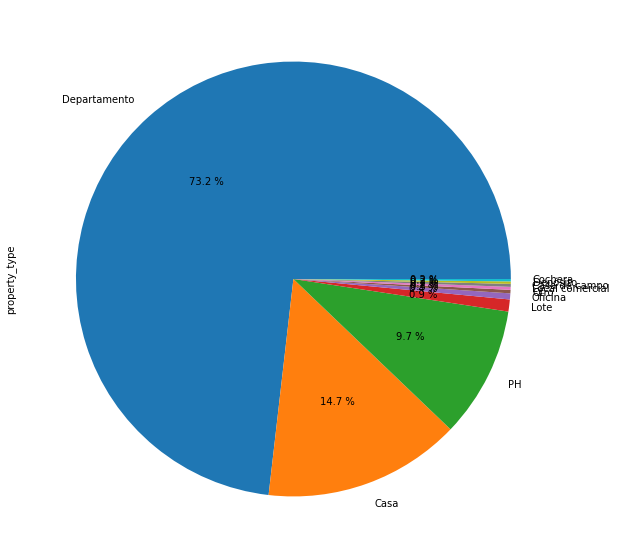

In [ ]:
#realizamos un grafico de pastel para observar que porcentaje de 0-100 corresponde a cada columna dentro del Dataset
frec.plot.pie(y='price',figsize=(10, 10), autopct="%0.1f %%", )

*Departamento corresponde al 73.2% de datos que se encuentran en el dataset. Casa y PH son representativos de igual manera. A partir de esto puedo empezar a determinar con que tipos de variables puedo empezar el analizar el problema a enfrentar.*

--------------------------------------------------------------------------------

In [ ]:
#creamos un nuevo dataset para guardar los valores de frecuenia encontrados
data1 = pd.DataFrame(frec)
data1['index'] = data1.index
data1.rename(columns={"index":"Tipo de propiedad","property_type":"Frecuencia"}, inplace = True)
data1

Frecuencia Tipo de propiedad
Departamento         107326      Departamento
Casa                  21521              Casa
PH                    14298                PH
Lote                   1312              Lote
Oficina                 658           Oficina
Otro                    374              Otro
Local comercial         325   Local comercial
Casa de campo           322     Casa de campo
Depósito                265          Depósito
Cochera                 259           Cochera

***visualisamos el comportamiento de frecuencia vs property type, graficando con un scatterplot***

Text(0.5, 1.0, 'scatter: frecuencia vs tipo de de propiedades')

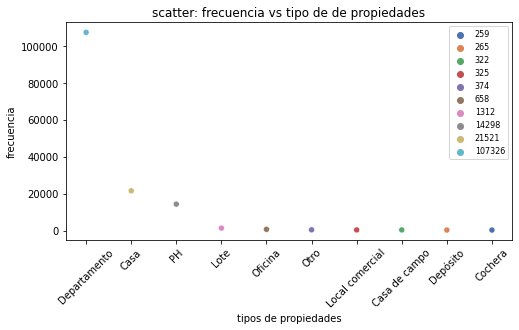

In [ ]:
plt.figure(figsize=(8,4))
g = sns.scatterplot(data = data1, x = "Tipo de propiedad", y = "Frecuencia", palette="deep", hue="Frecuencia")
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.xlabel('tipos de propiedades')
plt.ylabel('frecuencia')
plt.title('scatter: frecuencia vs tipo de de propiedades')

*Se corrobora el grafico de pastel, indicando que Departamento tiene mayor frecuencia, seguido de casa y PH*

--------------------------------------------------------------------------------

***Se realiza un histograma para teener otra perspecitva de la tendencia de los datos***

No handles with labels found to put in legend.


Text(0.5, 1.0, 'histograma de frecuencia vs tipo de propiedades')

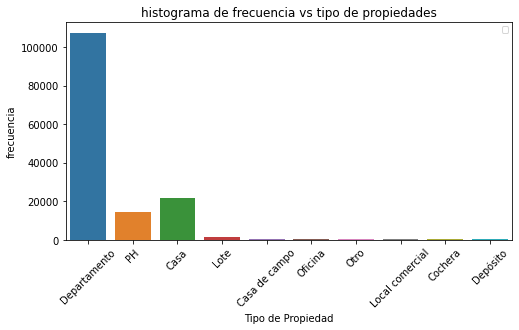

In [ ]:
#histograma de property_type
plt.figure(figsize=(8,4))
sns.countplot(data = Departamento, x = "property_type")
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.ylabel('frecuencia')
plt.xlabel('Tipo de Propiedad')
plt.title('histograma de frecuencia vs tipo de propiedades')

*En el histograma de frecuencia vs tipo de propiedad, es mas evidente determinar otros atributos que no son tan relevantes en cuanto a cantidad.*

--------------------------------------------------------------------------------

### **Analisis Frecuencia relativa vs property type**

In [ ]:
#frecuencia relativa de property_types. frecuencia absoluta/ numero total de la poblacion o muestra
frecuencia = 100 * Departamento['property_type'].value_counts() / len(Departamento['property_type'])
frecuencia

Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64

In [ ]:
#se crea un nuevo dataframe data2 para guardar lo nuevos valores de la frecuencia relativa
data2 = pd.DataFrame(frecuencia)
data2['index'] = data2.index
data2.rename(columns={"index":"Tipo de propiedad","property_type":"Frecuencia relativa"}, inplace = True)
data2

Frecuencia relativa Tipo de propiedad
Departamento               73.180145      Departamento
Casa                       14.674076              Casa
PH                          9.749080                PH
Lote                        0.894586              Lote
Oficina                     0.448657           Oficina
Otro                        0.255012              Otro
Local comercial             0.221601   Local comercial
Casa de campo               0.219555     Casa de campo
Depósito                    0.180690          Depósito
Cochera                     0.176599           Cochera

***La tabla evidencia que el porcentaje de otros atributos representan una minima parte del dataset por debajo del 1 %***

Text(0.5, 1.0, 'scatter: frecuencia vs tipo de de propiedades')

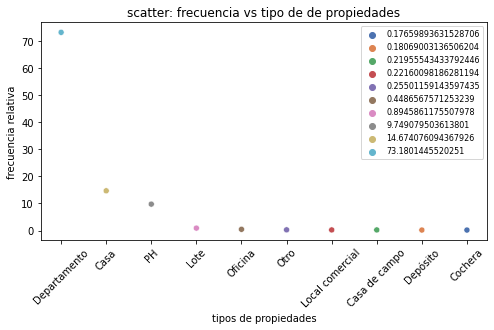

In [ ]:
plt.figure(figsize=(8,4))
g = sns.scatterplot(data = data2, x = "Tipo de propiedad", y = "Frecuencia relativa", palette="deep", hue="Frecuencia relativa")
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.xlabel('tipos de propiedades')
plt.ylabel('frecuencia relativa')
plt.title('scatter: frecuencia vs tipo de de propiedades')

*Graficando frecuencia relativa vs tipos de propiedades, confirmamos nuevamente el diagrama de pastel, corroborando los porcentajes y la tendencia que corresponden a cada tipo de propiedad. Siendo Departamento con la frecuencia relativa mas alta seguido de casa y PH.*

--------------------------------------------------------------------------------

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

### **para la columna l2**

Analisamos datos unicos

In [ ]:
#analizamos cuales son los datos unicos y cuantos son de la columna l2
print(Departamento["l2"].unique())
print(Departamento["l2"].nunique())

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
4


### **para la columna l3**

Analisamos datos unicos

In [ ]:
#analizamos cuales son los datos unicos y cuantos son de la columna l3
print(Departamento["l3"].unique())
print(Departamento["l3"].nunique())

['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 'Moreno' 'General Rodríguez' 'Monte Cast

### **Analisis de las columnas l2 y l3**

***Analisamos las regiones de Gran Buenos Aires***

*frecuencia relativa vs Gran Buenos Aires (Columna l2)*

In [ ]:
#Gran buenos aires con mas propiedades publicada 
#frecuencia relativa de property_types. frecuencia absoluta/ numero total de la poblacion o muestra
frecuencia_propiedades = 100 * Departamento['l2'].value_counts() / len(Departamento['l2'])
frecuencia_propiedades

Capital Federal             63.097641
Bs.As. G.B.A. Zona Norte    16.556662
Bs.As. G.B.A. Zona Sur      11.709396
Bs.As. G.B.A. Zona Oeste     8.636302
Name: l2, dtype: float64

In [ ]:
#se crea un nuevo dataset data3 para guardar lo nuevos valores de la frecuencia relativa
data3 = pd.DataFrame(frecuencia_propiedades)
data3['index'] = data3.index
data3.rename(columns={"index":"Gran Buenos Aires","l2":"Frecuencia_rel_cap"}, inplace = True)
data3

Frecuencia_rel_cap         Gran Buenos Aires
Capital Federal                    63.097641           Capital Federal
Bs.As. G.B.A. Zona Norte           16.556662  Bs.As. G.B.A. Zona Norte
Bs.As. G.B.A. Zona Sur             11.709396    Bs.As. G.B.A. Zona Sur
Bs.As. G.B.A. Zona Oeste            8.636302  Bs.As. G.B.A. Zona Oeste

*Las publicaciones vienen de las localidades de: Capital Federal, Zona norte, Zona sur y Zona Oeste, que conforman El Gran Buenos Aires .*

--------------------------------------------------------------------------------

***Analizamos los barrios de las 4 provincias***

*frecuencia relativa vs barrios (Columna l3)*

In [ ]:
#barrios con mas propiedades publicada 
#frecuencia relativa de property_types. frecuencia absoluta/ numero total de la poblacion o muestra
frec_propiedades_2 = 100 * Departamento['l3'].value_counts() / len(Departamento['l3'])
frec_propiedades_2

Palermo            8.913814
Tigre              5.944361
Almagro            5.132279
Belgrano           4.728624
Caballito          4.534297
                     ...   
Cañuelas           0.073640
Villa Soldati      0.047048
Villa Riachuelo    0.028638
Marcos Paz         0.023865
Catalinas          0.003409
Name: l3, Length: 89, dtype: float64

In [ ]:
#se crea un nuevo dataframe data3 para guardar lo nuevos valores de la frecuencia relativa
data4 = pd.DataFrame(frec_propiedades_2)
data4['index'] = data4.index
data4.rename(columns={"index":"Barrios","l3":"frec_rel_cap_2"}, inplace = True)
data4

frec_rel_cap_2          Barrios
Palermo                8.913814          Palermo
Tigre                  5.944361            Tigre
Almagro                5.132279          Almagro
Belgrano               4.728624         Belgrano
Caballito              4.534297        Caballito
...                         ...              ...
Cañuelas               0.073640         Cañuelas
Villa Soldati          0.047048    Villa Soldati
Villa Riachuelo        0.028638  Villa Riachuelo
Marcos Paz             0.023865       Marcos Paz
Catalinas              0.003409        Catalinas

[89 rows x 2 columns]

***Graficos de: frecuencia relativa vs Gran Buenos Aires y Frecuencia relativa vs barrios***

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

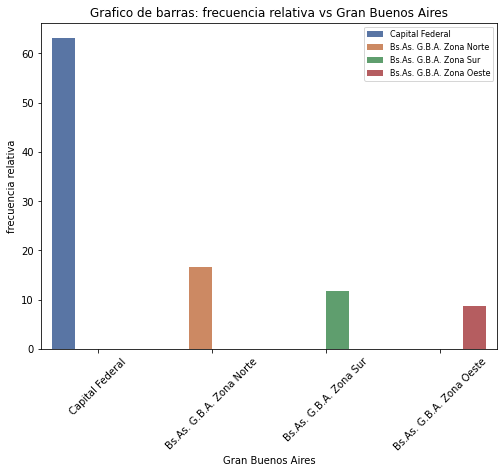

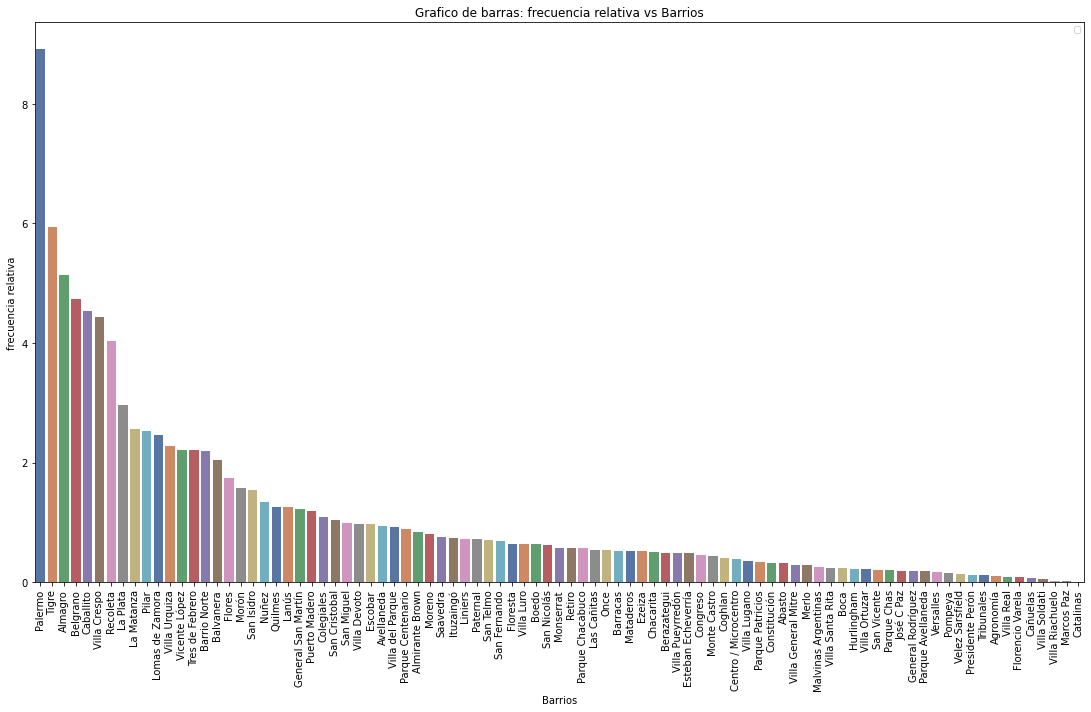

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(data = data3, x = "Gran Buenos Aires", y = "Frecuencia_rel_cap", palette="deep", hue="Gran Buenos Aires") 
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.xlabel('Gran Buenos Aires')
plt.ylabel('frecuencia relativa')
plt.title('Grafico de barras: frecuencia relativa vs Gran Buenos Aires')

plt.figure(figsize=(30,10))
plt.subplot(1,2,2)
sns.barplot(data = data4, x = "Barrios", y = "frec_rel_cap_2", palette="deep") 
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=90)
plt.xlabel('Barrios')
plt.ylabel('frecuencia relativa')
plt.title('Grafico de barras: frecuencia relativa vs Barrios')


plt.tight_layout()
plt.show

*La grafica de frecuencia relativa Vs Gran Buenos Aires muestra que, la mayor cantidad de anucios se dan en capital federal, con un porcentaje del 63 % de acuerdo a la tabla de frecuencia relativa. Se puede deducir rapidamente, que es la localidad mas buscada entre las 4 provincias mencionadas.*

*La grafica de frecuencia relativa vs barrios, muestra que el barrio mas buscado es palermo, con un porcentaje de 8.9%. Es importante aclarar que Palermo hace parte de la locadlida de Capital Federal.*

--------------------------------------------------------------------------------

***Como nuestra variable mas importante es precio, analizamos como se comporta respecto a las columnas l2 y l3.***

*Este analisis de variable importante (precio), se obtiene entediento que el objetivo del proyecto es predecir el valor de un inmueble, conociendo otras caracteristicas.*

Text(32.81225694444445, 0.5, 'Precio')

<Figure size 1080x576 with 0 Axes>

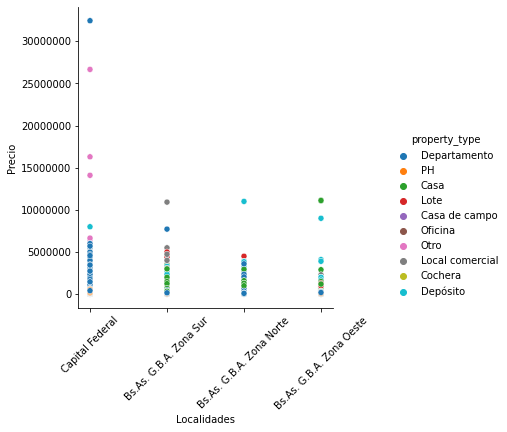

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(Departamento,x_vars=['l2'],y_vars=['price'],hue='property_type', height=5)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=45)
plt.xlabel('Localidades')
plt.ylabel('Precio')
#plt.xlim(0,12)
#plt.ylim(0,3050000)

*La grafica de precio vs Localidades asegura que el valor mas alto de una propiedad se encuentra dentro de Capital Federal, y es de tipo Departamento. Es posible observar que hay una gran cantidad de puntos azules, lo cual indica que en esa provincia, lo mas probable es encontrar mas Departamentos que otros atributos como casas PH u otros tipos de propiedades. Por otro lado, en Zona Sur, esto no sucede de la misma manera, y el color verde sobresale mas que cualquier tipo de propiedad, al igual que Zona norte y Zona oeste. Sin embargo, esto es una conclusion apresurada que no se debe tomar del todo cierta.*

--------------------------------------------------------------------------------

***Analisis del precio en funcion de las 4 localidades***

*Capital Federal*

In [ ]:
Capital_fed =  Departamento[Departamento['l2'] == "Capital Federal"]

In [1]:
plt.figure(figsize=(15,8))
sns.pairplot(Capital_fed,x_vars=['l3'],y_vars=['price'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.title( 'Precio Vs Capital Federal')
plt.xlabel('Barrios de Capital Federal')
plt.ylabel('Precio')
#plt.xlim(0,12)
plt.ylim(0,7000000)

NameError: ignored

*Es posible observar que la mayor cantidad de propiedades dentro Capital Federal son los Departamentos, los cuales llegan a tener precios muy altos en barrios como palermo, Puerto Madero y Recoleta.Por otro lado, en barrios como villa deboto es posible observar puntos verdes que corresponden a casas con precios no tan altos comparados con los Departamentos*. 

*Propiedades como PH, lote, oficinas, otros para Capital Federal no encontraremos precios superiores a $ 1,000,000.*

*En una gran mayoria encontraremos tipos de propiedades con un alto precio, dando a entender que puede encontrarse algunos barrios con partes que son exclusivas y que tienen ciertos lujos, lo que se concoe como estratos mas altos.*

--------------------------------------------------------------------------------

*Zona Sur*

In [ ]:
zonasur =  Departamento[Departamento['l2'] == "Bs.As. G.B.A. Zona Sur"]


(0.0, 7000000.0)

<Figure size 1080x576 with 0 Axes>

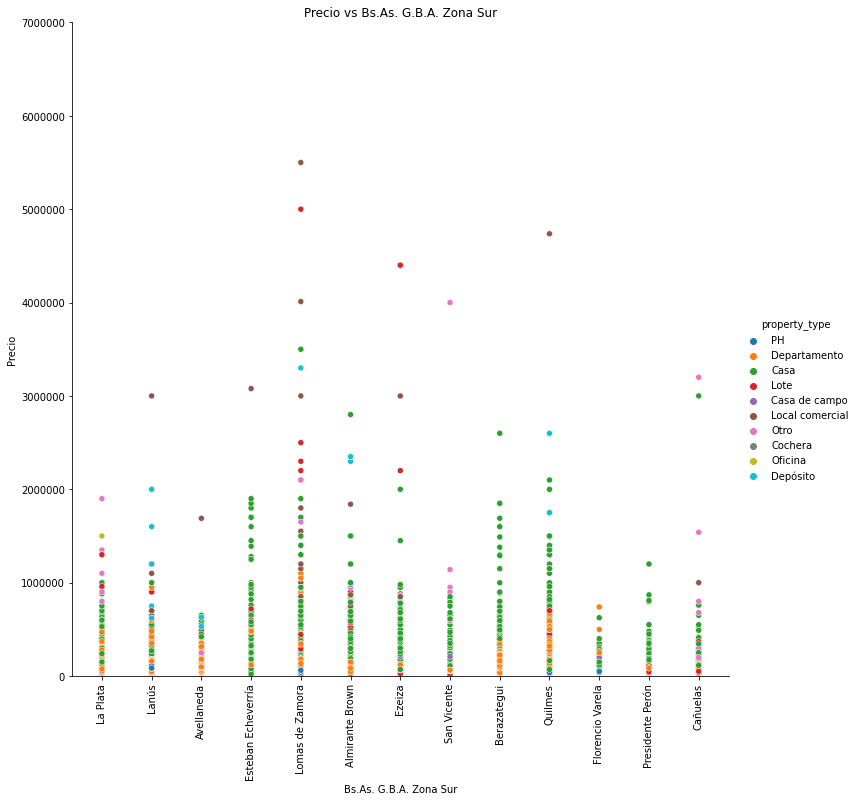

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(zonasur,x_vars=['l3'],y_vars=['price'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.title('Precio vs Bs.As. G.B.A. Zona Sur')
plt.xlabel('Bs.As. G.B.A. Zona Sur')
plt.ylabel('Precio')
#plt.xlim(0,12)
plt.ylim(0,7000000)

*La grafica de Precio vs Zona sur, evidencia un gran numero de casas en diferentes puntos de la localidad. Es completamente diferente a capital federal, y se podria decir que es una provincia donde las personas prefieren casas para vivir. Se podria plantear la idea, por ejemplo, de un grupo familiar con preferencias a vivir en propiedades mas grandes, con precios mas bajos. En este caso en particular, los puntos naranjas corresponden a los Departamentos, los cuales se encuentras en rangos que estan por debajo de $800,000 y por debajo de las propiedades de casas.*

--------------------------------------------------------------------------------

*Zona Norte*

In [ ]:
zonanor =  Departamento[Departamento['l2'] == "Bs.As. G.B.A. Zona Norte"]


(0.0, 7000000.0)

<Figure size 1080x576 with 0 Axes>

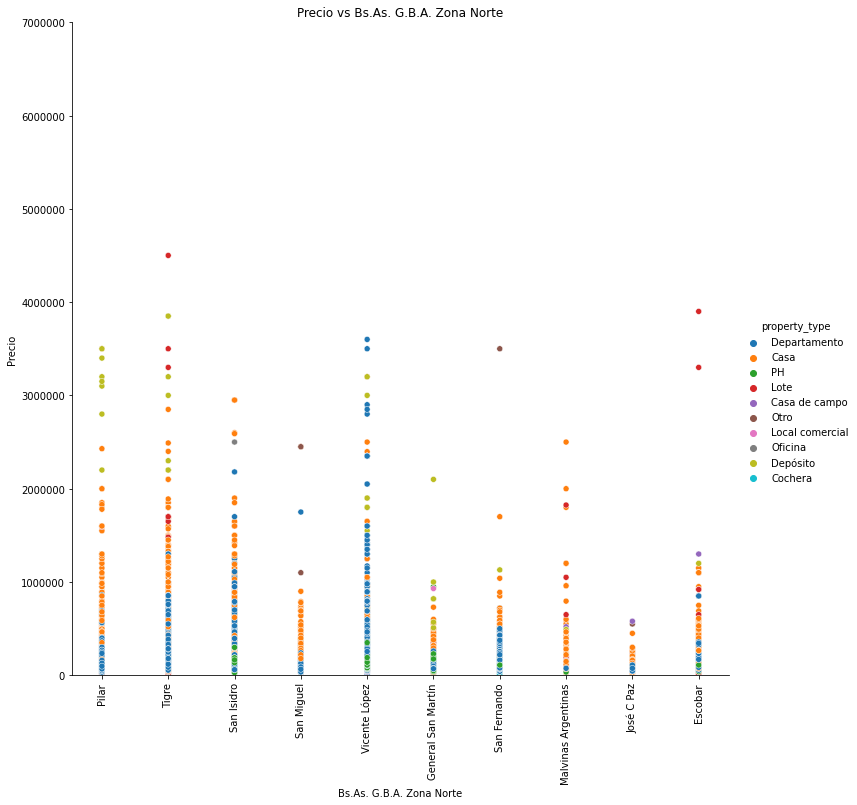

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(zonanor,x_vars=['l3'],y_vars=['price'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.title('Precio vs Bs.As. G.B.A. Zona Norte')
plt.xlabel('Bs.As. G.B.A. Zona Norte')
plt.ylabel('Precio')
#plt.xlim(0,12)
plt.ylim(0,7000000)

*En zona norte es posible identificar el barrio General San Martin, donde hay una gran cantidad de Departamentos, pero en si observamos los demas barrios, sigue predominando las casas con precios superiores a $1,000,000.*

*Las propiedades PH se encuentran dentro de rangos menores a $400,000 aproximadamente, lo cual me representa pocos anuncios.*

*Para la zona norte hay depositos con valores muy elevados, los cuales tendrian una explicacion logica, pero se desconoce por el momento.*

--------------------------------------------------------------------------------

*Zona Oeste*

In [ ]:
zonaoes =  Departamento[Departamento['l2'] == "Bs.As. G.B.A. Zona Oeste"]


(0.0, 3000000.0)

<Figure size 1080x576 with 0 Axes>

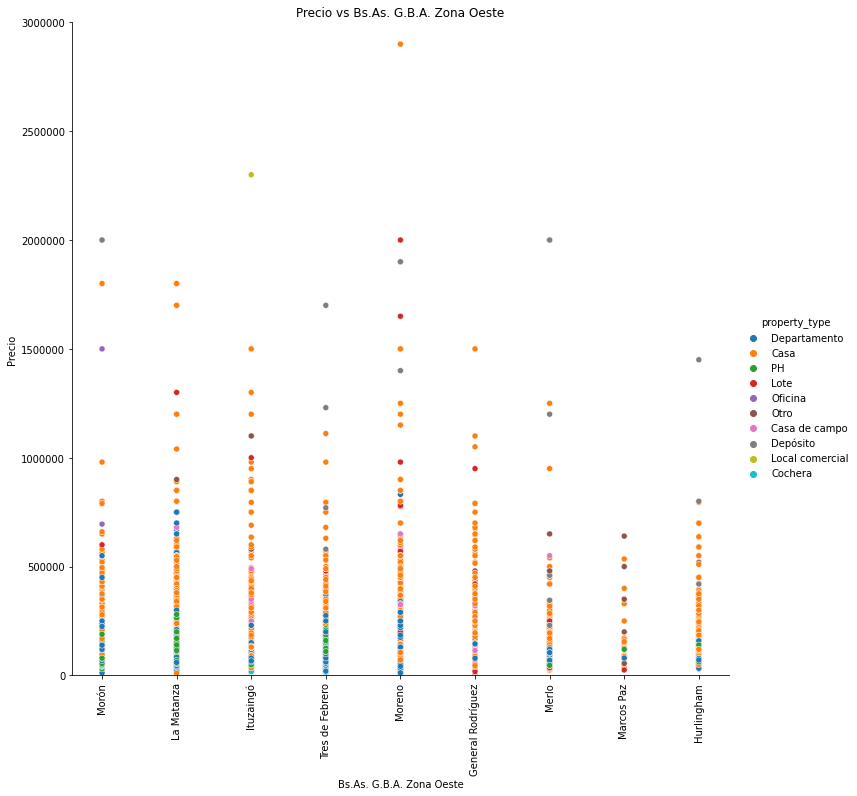

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(zonaoes,x_vars=['l3'],y_vars=['price'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.title('Precio vs Bs.As. G.B.A. Zona Oeste')
plt.xlabel('Bs.As. G.B.A. Zona Oeste')
plt.ylabel('Precio')
#plt.xlim(0,12)
plt.ylim(0,3000000)

*En la zona Oeste, se observa mayor diversidad en cuanto a la distribucion de tipos de propiedades. Es evidente la mayor cantidad de Departamentos que se presentan, sin embargo, se puede identificar diferentes tipos de propiedades que se reparten en diferentes barrios. Esto puede suceder ya que la diferencia en precios no es tan alta en comparacion a otras provincias. Se puede intuir que no es una provincia con alto desarrollo. Por lo general se encontraran precios de $500,000.*

--------------------------------------------------------------------------------

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

*Filtramos por las 3 clases mas abundantes de tipos de propiedades*

In [ ]:
#creamos un nuevo dataset con los 3 tipos de propiedades mas abundantes
lista_propiedades = ["Departamento","Casa","PH"]

datos_propiedades = Departamento.loc[Departamento["property_type"].isin(lista_propiedades)]
datos_propiedades.head()

start_date    end_date  ... operation_type                     geometry
0  2019-10-17  2019-12-23  ...          Venta  POINT (-58.38495 -34.60588)
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)
2  2019-10-17  2019-11-01  ...          Venta  POINT (-58.42747 -34.59357)
3  2019-10-17  2019-12-23  ...          Venta  POINT (-58.43675 -34.58129)
4  2019-10-17  2020-03-11  ...          Venta  POINT (-57.93822 -34.91419)

[5 rows x 20 columns]

*Se identifica cómo cambió la variable precio despues del primer filtro.*

In [ ]:
#Aqui obtenemos el precio de mayor a menor para identificar sus caracteristicas.
columna = "price"
datos_propiedades.sort_values(by = columna, ascending = False).head(5)

start_date    end_date  ... operation_type                     geometry
76894   2019-10-25  2019-11-06  ...          Venta  POINT (-58.41586 -34.59396)
95484   2019-08-25  2019-09-07  ...          Venta  POINT (-58.56759 -34.59037)
30220   2019-09-03  2019-09-07  ...          Venta  POINT (-58.58800 -34.60151)
106771  2019-09-12  9999-12-31  ...          Venta  POINT (-58.59138 -34.59623)
255     2019-10-17  9999-12-31  ...          Venta  POINT (-58.56990 -34.59823)

[5 rows x 20 columns]

*Se observa que para un precio muy alto, obtenemos un ambiente con un valor de 1, con 4 baños y una superficie total pequeña para su precio. Esto lleva a pensar dos cosas: La primera, es un dato atipico. Segundo, es un Departamento muy pequeño con demasiados lujos que deja la superficie total sin mucho valor a la hora de comprarlo, lo cual no tiene mucho sentido.*

--------------------------------------------------------------------------------

In [ ]:
#observamos las dimensiones del dataset
datos_propiedades.shape

(143145, 20)

*Filtramos el dataset por la region con mas propiedades publicadas*

In [ ]:
#filtramos por la region con mas propiedades publicadas, en este caso es capital federal
region = ["Capital Federal"]
datos_prop_2 = datos_propiedades.loc[datos_propiedades['l2'].isin(region)] 
datos_prop_2.head()

start_date    end_date  ... operation_type                     geometry
0  2019-10-17  2019-12-23  ...          Venta  POINT (-58.38495 -34.60588)
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)
2  2019-10-17  2019-11-01  ...          Venta  POINT (-58.42747 -34.59357)
3  2019-10-17  2019-12-23  ...          Venta  POINT (-58.43675 -34.58129)
5  2019-10-17  2019-11-01  ...          Venta  POINT (-58.44124 -34.59378)

[5 rows x 20 columns]

In [ ]:
#dimensiones del dataset
datos_prop_2.shape

(91485, 20)

*Se identifica cómo cambió la varible precio despues del filtro*

In [ ]:
#Aqui obtenemos el precio de mayor a menor para identificar sus caracteristicas.
columna = "price"
datos_prop_2.sort_values(by = columna, ascending = False).tail(5)

start_date    end_date  ... operation_type                     geometry
10799   2019-04-01  2019-10-10  ...          Venta  POINT (-58.44751 -34.63751)
117012  2019-03-15  2019-06-23  ...          Venta  POINT (-58.36259 -34.61107)
62989   2019-03-28  2019-03-30  ...          Venta  POINT (-58.40167 -34.58195)
102589  2019-04-30  2019-05-11  ...          Venta  POINT (-58.38931 -34.59128)
96337   2019-11-06  2019-12-23  ...          Venta              POINT (nan nan)

[5 rows x 20 columns]

*Se puede identificar nuevamente el dato atipico en el precio mas alto. Adicionalmente, el menor valor del precio se le atribuye a capital federal, con 1 ambiente, 1 cuarto y 1 baño a un precio de $7500. lo cual no deja muy claro si es un precio de venta o renta.*

--------------------------------------------------------------------------------

### ***MI NUEVO DATASET FILTRADO SE LLAMA datos_prop_2***

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

***Realizamos tabla estadistica para mi dataset (datos_prop_2)***

In [ ]:
# tabla estadistica del dataset
datos_prop_2.describe() 

lat           lon  ...  surface_covered         price
count  86951.000000  86937.000000  ...     82250.000000  9.148500e+04
mean     -34.599081    -58.436002  ...        94.966310  2.595003e+05
std        0.023957      0.036297  ...       778.515243  3.222654e+05
min      -34.696419    -58.530468  ...         1.000000  6.000000e+03
25%      -34.613757    -58.459605  ...        44.000000  1.200000e+05
50%      -34.599446    -58.433789  ...        63.000000  1.750000e+05
75%      -34.584148    -58.410143  ...        96.000000  2.790000e+05
max      -34.535818    -58.353930  ...    126062.000000  3.243423e+07

[8 rows x 8 columns]

Podemos identificar diferentes variables estadisticas importantes en la tabla.
1.   rooms : El promedio es de 3 cuartos, con un minimo de 1 y maximo de 26 cuartos.
2.   bedrooms: El promedio es de 2 habitaciones, con un minimo de 0 y un max de 15 habitaciones.
3. bathrooms: El promedio de 2 baños, con un minimo de 1 y un maximo de 14 baños.
surface_total: El promedio es de 113 m2, con un minimo de 10 y un maximo de 126062 m2.
4. Superficie cubierta: el valor minimo en este caso no tiene una interpretabilidad logico para ser de 1 m2. 
5. Precio: El promedio es de 259,500 dolares, con un minimo de 6,000 dolares y un maximo de $32,434,200.

*Un dato interesante es plantear que: rooms = bedrooms + bathrooms.*






--------------------------------------------------------------------------------

*Matriz de correlacion*

In [ ]:
#encontramos la matriz de correlacion
corr= datos_prop_2.corr()
corr

lat       lon  ...  surface_covered     price
lat              1.000000 -0.063281  ...         0.000296  0.171693
lon             -0.063281  1.000000  ...         0.006052  0.156230
rooms            0.002065  0.059762  ...         0.066757  0.448318
bedrooms        -0.009273  0.045443  ...         0.066174  0.413555
bathrooms        0.097078  0.079655  ...         0.058192  0.587724
surface_total   -0.002239  0.000084  ...         0.770742  0.049071
surface_covered  0.000296  0.006052  ...         1.000000  0.054534
price            0.171693  0.156230  ...         0.054534  1.000000

[8 rows x 8 columns]

*Es importante observar que: precio y superficie total, no estan muy correlacionadas en este punto*

--------------------------------------------------------------------------------

***Mapa de calor de correlaciones***

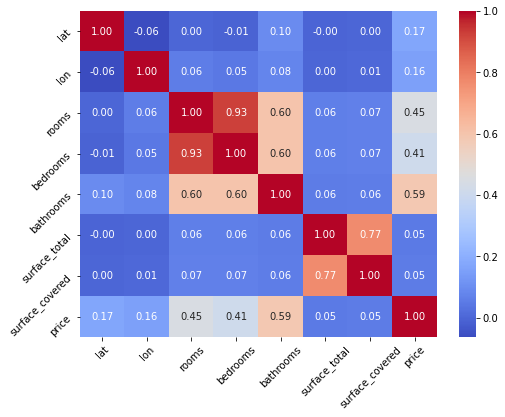

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt= '.2f',cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

*Las variables con mayor correlacion son precio vs rooms, precio vs bathrooms. rooms vs bedrooms,surface_total vs surface_covered. Entre mas se acerce al color rojo mayor corrrelacion tendran las variables.*

--------------------------------------------------------------------------------

### ***Analisis Estadistico de las variables mas importantes***

### ***Analisis de densidad de probabilidad***

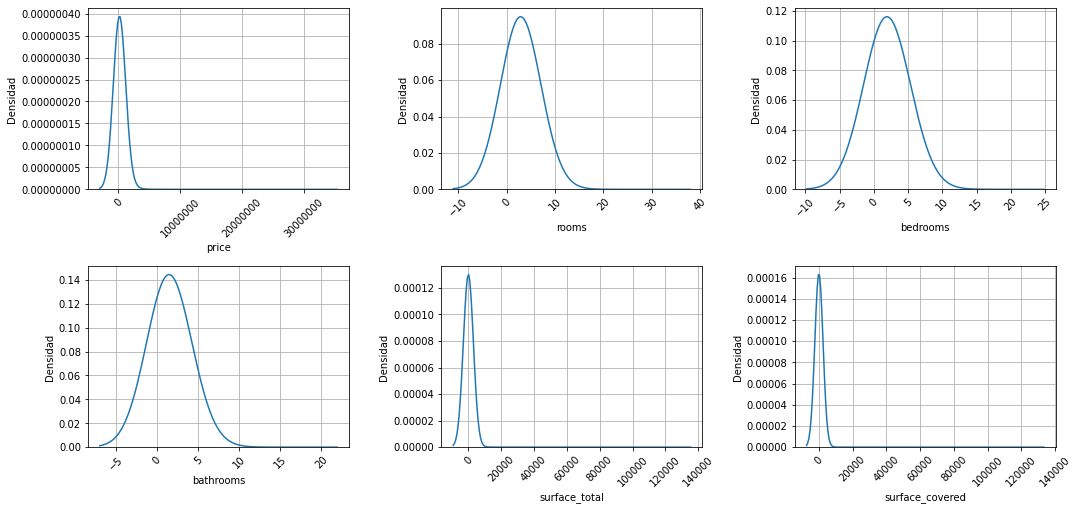

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.kdeplot(data=datos_prop_2, x="price",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()



plt.subplot(3,3,2)
sns.kdeplot(data=datos_prop_2, x="rooms",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()


plt.subplot(3,3,3)
sns.kdeplot(data=datos_prop_2, x="bedrooms",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()
 


plt.subplot(3,3,4)
sns.kdeplot(data=datos_prop_2, x="bathrooms",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()
 


plt.subplot(3,3,5)
sns.kdeplot(data=datos_prop_2, x="surface_total",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()



plt.subplot(3,3,6)
sns.kdeplot(data=datos_prop_2, x="surface_covered",bw_adjust=30)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
#plt.xlim(-1000000,2000000)
plt.xticks(rotation=45)
plt.ylabel('Densidad')
plt.grid()

plt.tight_layout() 


*Las graficas de densidad me indican donde se concentran la mayor densidad de probabilidad de los datos. El analisis indica, si observamos la campana, que es evidente un corrimiento hacia la izquierda, con un maximo que se acerca a cero, y hay una minoria de datos que se encuentran distribuidos hacia la derecha, con valores que aumentan, en la variable del eje x.*

--------------------------------------------------------------------------------

### ***Analisis de diagrama de caja***

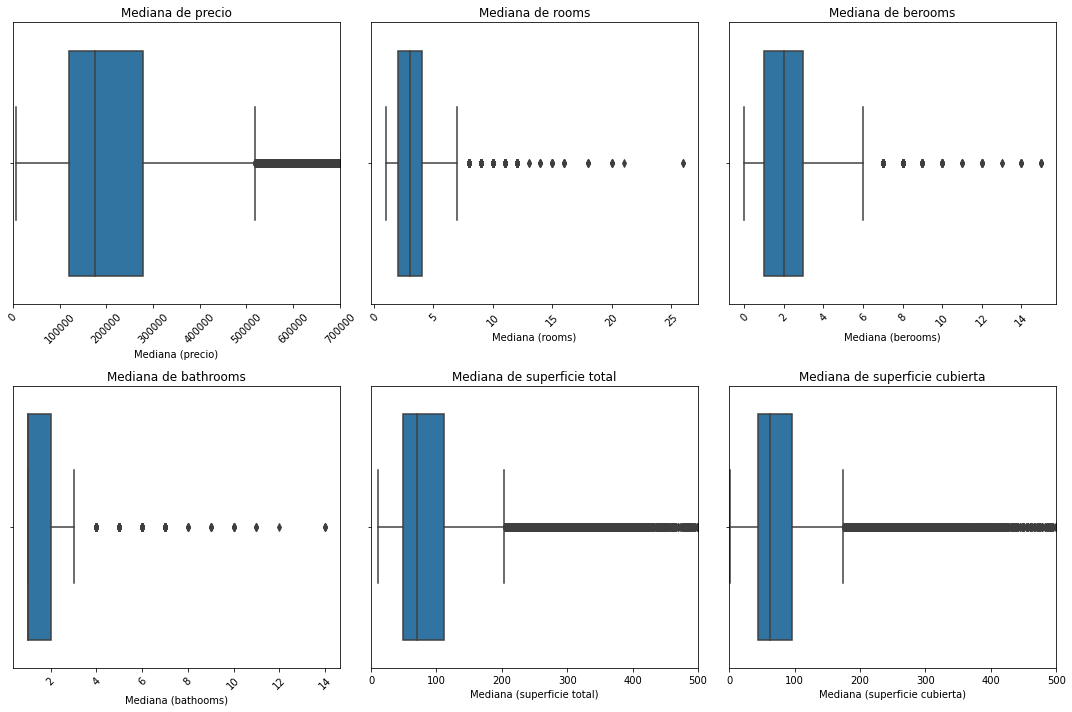

In [ ]:
#diagrama de caja 

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x ='price', data = datos_prop_2)
plt.xticks(rotation=45)
plt.xlim(000,700000)
plt.xlabel('Mediana (precio)')
plt.title('Mediana de precio') 



plt.subplot(2,3,2)
sns.boxplot(x='rooms', data = datos_prop_2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (rooms)')
plt.title('Mediana de rooms') 



plt.subplot(2,3,3)
sns.boxplot(x = 'bedrooms', data = datos_prop_2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (berooms)')
plt.title('Mediana de berooms') 


plt.subplot(2,3,4)
sns.boxplot(x = 'bathrooms', data = datos_prop_2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (bathooms)')
plt.title('Mediana de bathrooms') 


plt.subplot(2,3,5)
sns.boxplot(x = "surface_total", data = datos_prop_2)
plt.xlim(0,500)
plt.xlabel('Mediana (superficie total)')
plt.title('Mediana de superficie total') 


plt.subplot(2,3,6)
sns.boxplot(x = "surface_covered", data = datos_prop_2)
plt.xlim(0,500)
plt.xlabel('Mediana (superficie cubierta)')
plt.title('Mediana de superficie cubierta') 

plt.tight_layout()
plt.show()


*Se realiza un analisis visual hacia donde tienden los datos respecto a la mediana. Corroborando la densidad de probaibilidad, los diagramas de cajas evidencia que el 50% de los datos se encuentran en la parte derecha, mientras que el otro 50% se encuentran hacia la izquierda con varios valores atipicos o valores dispersosn respecto a la mediana.*

*En este analisis, es posible obtener un filtrado con los datos que nos permite determinar valores mas eficientes, que seran de utilidad para realizar las predicciones y utilizar nuestros modelos.*

### ***Analisis de Frecuencia***

<function matplotlib.pyplot.show>

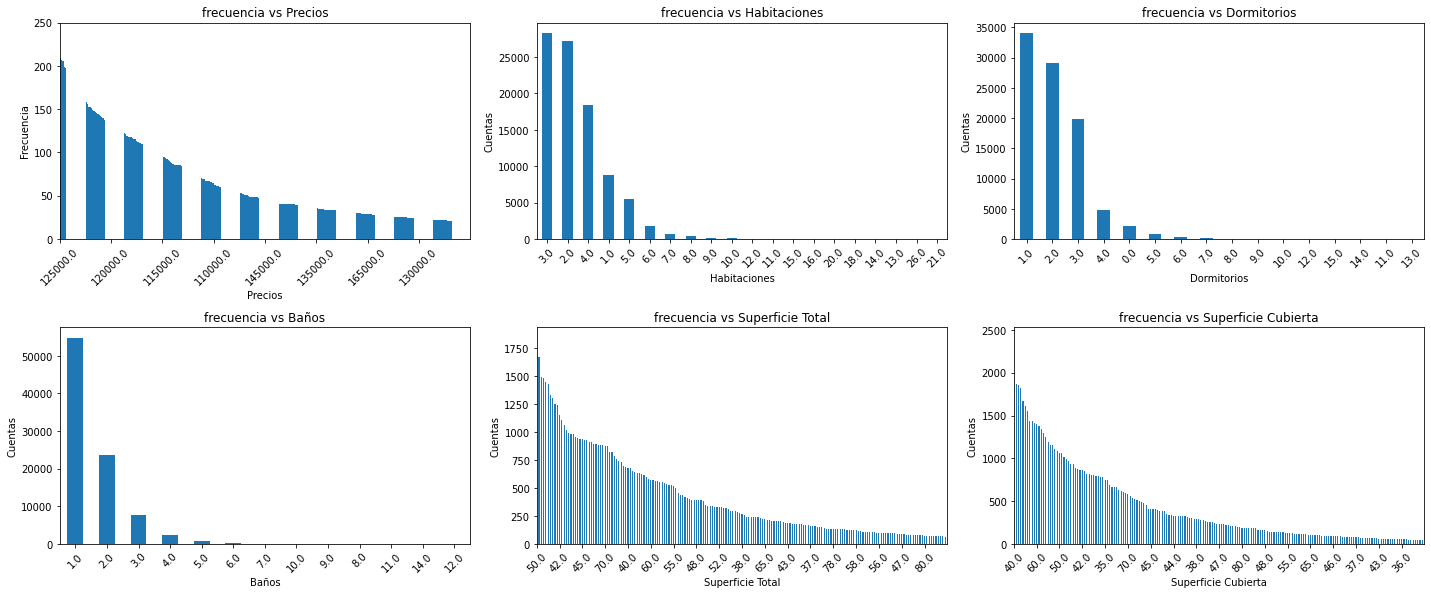

In [ ]:
plt.figure(figsize=(20,12))
#plt.tight_layout( pad = 2, h_pad= 5, w_pad= 10) 

plt.subplot(3,3,1)

# Gráfico de barras de precios
plot = datos_prop_2['price'].value_counts().plot(kind='bar')
plt.ylabel('Frecuencia')
plt.xlabel('Precios')
plt.title('frecuencia vs Precios')
plt.xticks(rotation=45)
plt.xlim(100,500)
plt.ylim(0,250)
plt.xticks(np.arange(100,500,step=50))
plt.show


plt.subplot(3,3,2)
# Gráfico de barras de habitaciones
plot = datos_prop_2['rooms'].value_counts().plot(kind='bar')
plt.ylabel('Cuentas')
plt.xlabel('Habitaciones')
plt.title('frecuencia vs Habitaciones')
plt.xticks(rotation=45)


plt.subplot(3,3,3)
# Gráfico de barras de dormitorios
plot = datos_prop_2['bedrooms'].value_counts().plot(kind='bar')
plt.ylabel('Cuentas')
plt.xlabel('Dormitorios')
plt.title('frecuencia vs Dormitorios')
plt.xticks(rotation=45)

plt.subplot(3,3,4)
# Gráfico de barras de baños
plot = datos_prop_2['bathrooms'].value_counts().plot(kind='bar')
plt.ylabel('Cuentas')
plt.xlabel('Baños')
plt.title('frecuencia vs Baños')
plt.xticks(rotation=45)

plt.subplot(3,3,5)
# Gráfico de barras de superficie total
plot = datos_prop_2['surface_total'].value_counts().plot(kind='bar')
plt.ylabel('Cuentas')
plt.xlabel('Superficie Total')
plt.title('frecuencia vs Superficie Total')
plt.xticks(rotation=45)
plt.xlim(0,180)
plt.xticks(np.arange(0, 180, step = 10))


plt.subplot(3,3,6)
# Gráfico de barras de superficie cubierta
plot = datos_prop_2['surface_covered'].value_counts().plot(kind='bar')
plt.ylabel('Cuentas')
plt.xlabel('Superficie Cubierta')
plt.title('frecuencia vs Superficie Cubierta')
plt.xticks(rotation=45)
plt.xlim(0,180)
plt.xticks(np.arange(0, 180, step = 10))

plt.tight_layout() 
plt.show

Los graficos de frecuencias dan informacion sobre los valores que mas se repiten dentro del dataset. Es posible observar los valores con mas precision para cada atributo y determinar un rango de valores para realizar un filtrado que permitan entender con mas facilidad como se comportan las variables.

Esto representa, que la probabilidad de encontrar ciertos atributos es mayor que otros. Por ejemplo en la variable habitaciones, es mas probable encontrar una propiedad que tenga 3 habitaciones que 5 habitaciones en capital federal. El rango de precio mas probable va desde 100,000 hasta 200,000 dolares. Una superficie total de 50 hasta 55 m2, las cuales tienen frecuencias mas altas y que se ubican dentro de las 3 propiedades mas representativas.

Es importante resaltar que las variables independientes no estan ordenadas de mayor a menos sino, que se ordenan de mayor frecuencia a menor frecuencia, con el fin de verificar los valores dispersos de nuestro dataset.


### ***Analisis de precio Vs atributos***

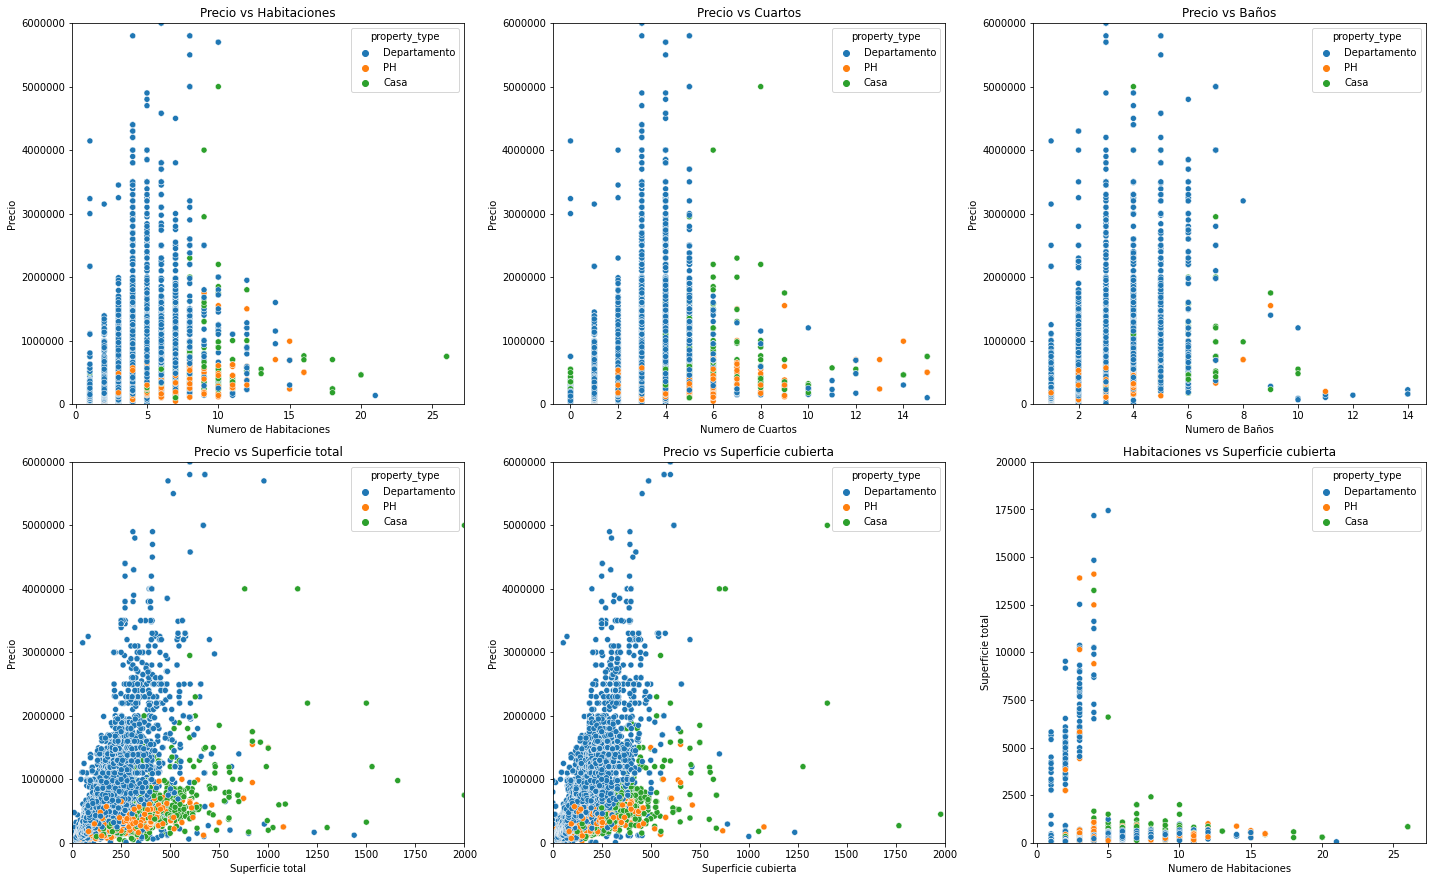

In [ ]:
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.scatterplot( x='rooms', y='price',  hue = 'property_type', data = datos_prop_2)
plt.ylabel('Precio')
plt.xlabel('Numero de Habitaciones')
plt.title('Precio vs Habitaciones')
plt.ylim(0,6000000)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(3,3,2)
sns.scatterplot( x='bedrooms', y='price',  hue = 'property_type', data = datos_prop_2)
plt.ylabel('Precio')
plt.xlabel('Numero de Cuartos')
plt.title('Precio vs Cuartos')
plt.ylim(0,6000000)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(3,3,3)
sns.scatterplot( x='bathrooms', y='price',  hue = 'property_type', data = datos_prop_2)
plt.ylabel('Precio')
plt.xlabel('Numero de Baños')
plt.title('Precio vs Baños')
plt.ylim(0,6000000)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(3,3,4)
sns.scatterplot( x='surface_total', y='price',  hue = 'property_type', data = datos_prop_2)
plt.ylabel('Precio')
plt.xlabel('Superficie total')
plt.title('Precio vs Superficie total')
plt.ylim(0,6000000)
plt.xlim(0,2000)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(3,3,5)
sns.scatterplot( x='surface_covered', y='price',  hue = 'property_type', data = datos_prop_2)
plt.ylabel('Precio')
plt.xlabel('Superficie cubierta')
plt.title('Precio vs Superficie cubierta')
plt.ylim(0,6000000)
plt.xlim(0,2000)
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(3,3,6)
sns.scatterplot( y='surface_total', x='rooms',  hue = 'property_type', data = datos_prop_2)
plt.xlabel('Numero de Habitaciones')
plt.ylabel('Superficie total')
plt.title('Habitaciones vs Superficie cubierta')
plt.ylim(0,20000)
#plt.ylim(0,20000)

plt.tight_layout()

1. Analisis de precio vs habitaciones: Se observa que el menor numero de habitaciones corresponde al tipo de propiedad de Departamento. Por otro lado, las casas tienden a menor valor con mayor numero de habitaciones. Hay que tener en cuenta que no se conoce el estrato para cada una de los puntos, el cual podria explicar este comportamiento. PH es obtiene valores intermedios con valores bajos en precio en comparacion con las dos variables de propiedades. Sin embargo, el mayor valor se encuentra dentro de Departamentos, lo cual es un indicativo de que podria vincularse en un barrio con un estrato muy alto.

2. Analisis de precio vs superficie total: La mayor superficie total se encuentra en las propiedades de casa con valores infreiores a los precios de los Departamentos, los cuales son muy altos pero con tendencia a superficies menores a casas. Dentro de capital federal se puede observar que se encuentran mas propiedades de tipos departamentos, lo cual se puede interpretar como una provincia con alto desarrollo que maneja precios elevados. Es importante notar que se encuentran de todo tipo de precios, pero hay mas probabilidad de encontrar precios por encima de 1,000,000 dolares un departamento que una casa o un PH. Claro está que tambien influye el estrato el cual es un atributo que no se toma en cuenta en esta seccion.

3. analisis de superficie total vs habitaciones: Se observa que, hay mayor superficie total para departamentos con menor numero de habitaciones en comparacion con casas. Esto se debe posiblemente a los lujos que tenga o la localizacion del mismo. Es mas probable encontrar superficies superiores a 2500 metros cuadrados que otro tipo de propiedad. Para valores entre 1300 y 2500 m2 aproximadamente, hay un gap que puede represntar un cambio en el barrio o estrato.

--------------------------------------------------------------------------------

### ***Analisis en barrios de capital federal***

<Figure size 1080x1440 with 0 Axes>

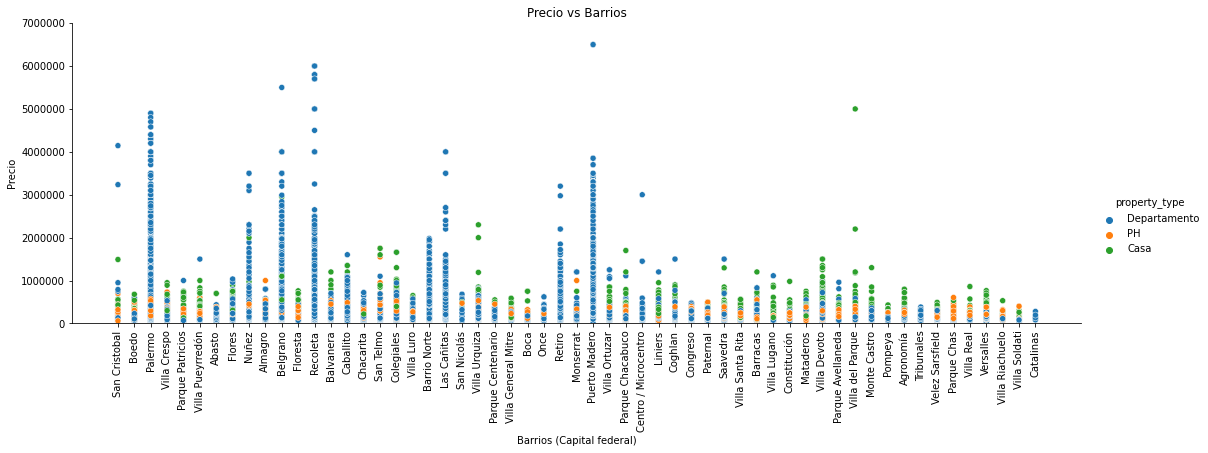

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(datos_prop_2,x_vars=['l3'],y_vars=['price'],hue='property_type',height=5, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,7000000)
plt.ylabel('Precio')
plt.xlabel('Barrios (Capital federal)')
plt.title('Precio vs Barrios') 
plt.show()
#plt.xlim(0,2050)


*Se puede observar que los barrios que presentan un mayor numero de departamentos con un valor monetario alto son:*

*1. Palermo presenta la columna de puntos con mayor altura en precio, con poca diversidad de tipos propiedades.*

*2. Belgrano con valores hasta de 4,000,000 dolares.*

*3. Recoleta que en su mayoria tiene Departamentos y muy pocas casas y PH, con valores muy exclusivos de 6,000,000 dolares.*

*4. Puerto Madero con precios hasta 4,000,000 dolares. Se identifica un punto muy alto que puede ser un dato atipico o un departamento muy lujoso para ese barrio, ya que esta muy alejado de los datos*

<Figure size 1080x1440 with 0 Axes>

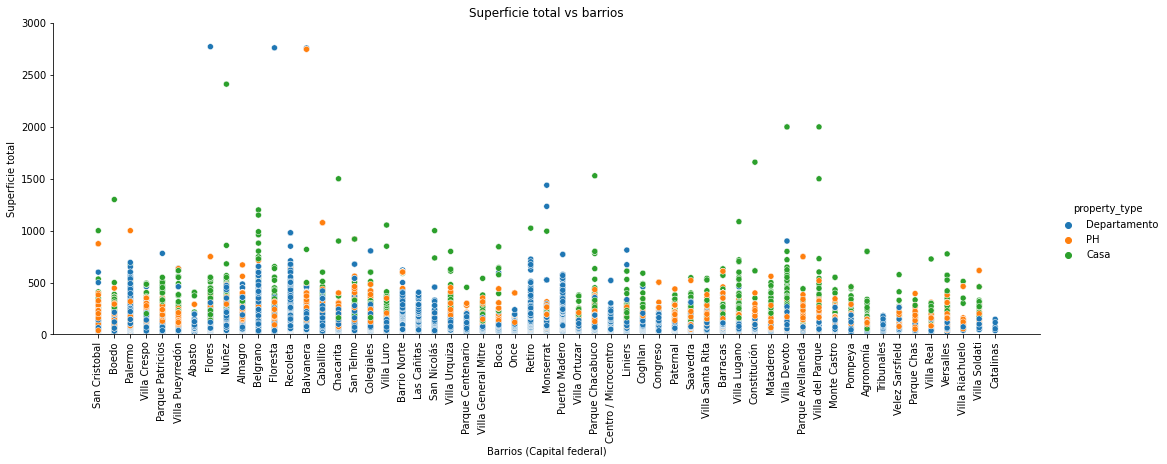

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(datos_prop_2,x_vars=['l3'],y_vars=['surface_total'],hue='property_type',height=5, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,3000)
plt.ylabel('Superficie total')
plt.xlabel('Barrios (Capital federal)')
plt.title('Superficie total vs barrios') 
plt.show()
#plt.xlim(0,2050)

*Este grafico de superficie total vs barrios, confirma dentro de los datos que los departamentos presentan un valor alto pero con una superficie menor, en comparacion con las casas y PH, en la mayoria de los barrios de capital federal. Y a diferencia del grafico anterior, hay mas puntos verdes y naranjas que sobresalen por encima de los azules. *
*Por ejemplo en Belgranoes mas probable encontrar una casa con una superficie entre 800 y 1000 metros cuadrados, mientras que en departamentos se encuentran por debajo de 600 metros cuadrados aproximadamente.*

*Los datos mas dispersos pueden signifcar un cambio en el estrato dentro de un mismo barrio, que tenga mas privilegios o lujos en un tipo de propiedad.*

--------------------------------------------------------------------------------

<Figure size 1440x1440 with 0 Axes>

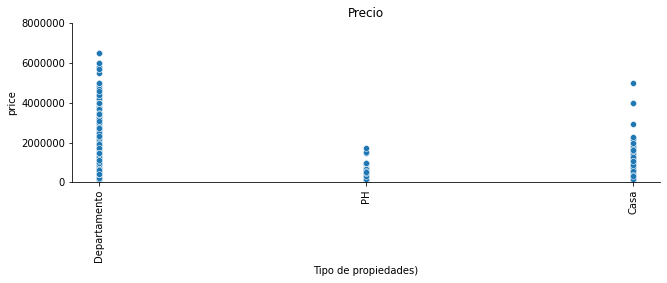

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(datos_prop_2,x_vars=['property_type'],y_vars=['price'],height=3, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,8000000)
plt.xlabel('Tipo de propiedades)')
plt.title('Precio') 
plt.show()
#plt.xlim(0,2050)

*Este grafico representa que es mas probable encontrar departamentos con precios por enicma de 3 millones de dolares, mientras que en PH y casas los precios son inferiores.*

--------------------------------------------------------------------------------

### ***Empezamos a filtrar, con los datos estadisticos y valores analisados anteriormente, nuestro dataset***

In [ ]:
# filtro surface_covered la cual no puede ser mayor a surface_total
datos_prop_3 = datos_prop_2.drop(datos_prop_2[datos_prop_2['surface_covered']> datos_prop_2['surface_total']].index)
datos_prop_3.shape

(90725, 20)

In [ ]:
#filtramos los valores de rooms
datos_prop_4 = datos_prop_3.drop((datos_prop_3[datos_prop_3['rooms'] < 1 ].index) | (datos_prop_3[datos_prop_3['rooms'] >= 5 ].index))
datos_prop_4.shape

(82216, 20)

In [ ]:
#filtramos los valores de bedrooms
datos_prop_5 = datos_prop_4.drop((datos_prop_4[datos_prop_4['bedrooms'] < 1].index) | (datos_prop_4[datos_prop_4['bedrooms'] >= 5].index))
datos_prop_5.shape

(79995, 20)

In [ ]:
#filtramos los valores de bathrooms
datos_prop_6 = datos_prop_5.drop((datos_prop_5[datos_prop_5['bathrooms'] < 1].index) | (datos_prop_5[datos_prop_5['bathrooms'] > 3].index))
datos_prop_6.shape

(78489, 20)

In [ ]:
#filtramos los valores de superficie total
datos_prop_7 = datos_prop_6.drop((datos_prop_6[datos_prop_6['surface_total'] < 40].index) | (datos_prop_6[datos_prop_6['surface_total'] >= 100].index))
datos_prop_7.shape

(54019, 20)

In [ ]:
#filtramos los valores de superficie cubierta
datos_prop_8 = datos_prop_7.drop((datos_prop_7[datos_prop_7['surface_covered'] < 40].index) | (datos_prop_7[datos_prop_7['surface_covered'] >= 100].index))
datos_prop_8.shape

(50199, 20)

In [ ]:
#filtramos los valores de precio
datos_prop_9 = datos_prop_8.drop((datos_prop_8[datos_prop_8['price'] < 100000].index) | (datos_prop_8[datos_prop_8['price'] >= 300000].index))


In [ ]:
datos_prop_9.shape

(42008, 20)

--------------------------------------------------------------------------------

### ***Creamos nuevamente un geopandas para analizar los precios dentro de capital federal***

In [ ]:
# Cargar la capa temática
import geopandas as gpd
import matplotlib.pyplot as plt
df_geo2  = gpd.GeoDataFrame(datos_prop_9, geometry=gpd.points_from_xy(datos_prop_9.lon, datos_prop_9.lat))
df_geo2.head(2)

start_date    end_date  ... operation_type                     geometry
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)
2  2019-10-17  2019-11-01  ...          Venta  POINT (-58.42747 -34.59357)

[2 rows x 20 columns]

In [ ]:

df_geo2 = df_geo2.dropna()


In [ ]:
df_geo2.isnull()

start_date  end_date  ...  operation_type  geometry
1            False     False  ...           False     False
2            False     False  ...           False     False
3            False     False  ...           False     False
5            False     False  ...           False     False
6            False     False  ...           False     False
...            ...       ...  ...             ...       ...
146539       False     False  ...           False     False
146540       False     False  ...           False     False
146542       False     False  ...           False     False
146543       False     False  ...           False     False
146549       False     False  ...           False     False

[34999 rows x 20 columns]

In [ ]:
df_geo3  = gpd.GeoDataFrame(df_geo2, geometry=gpd.points_from_xy(df_geo2.lon, df_geo2.lat))
df_geo3.head(2)

start_date    end_date  ... operation_type                     geometry
1  2019-10-17  2019-11-21  ...          Venta  POINT (-58.41211 -34.62406)
2  2019-10-17  2019-11-01  ...          Venta  POINT (-58.42747 -34.59357)

[2 rows x 20 columns]

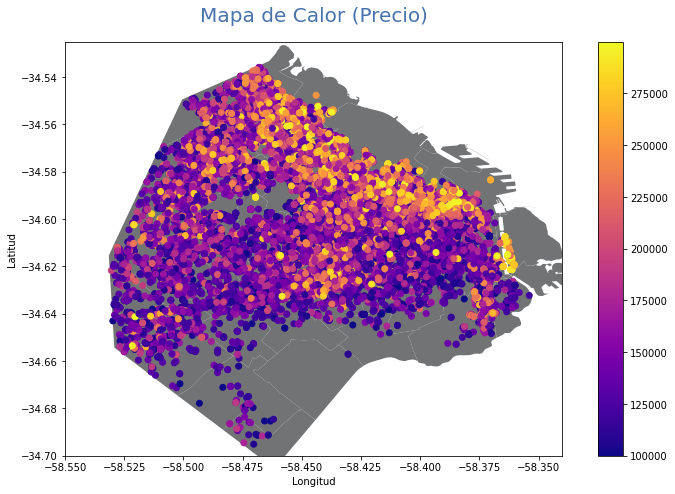

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-58.55, -58.34, -34.7, -34.525])
 
# Control del título y los ejes
ax.set_title('Mapa de Calor (Precio)', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
 
# Generar y cargar el mapa
df_geo3.plot(column='price', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5, categorical = False)
#df_geo3.plot(column='l2', cmap='coolwarm', ax=ax,
             # legend=True, cax=cax, zorder=0)#e7f0e6

# Cargar un mapa base con contornos de países
barrios = "/content/driven/MyDrive/Colab Notebooks/datasets/barrios.csv"
map_barrios = gpd.read_file(barrios)
map_barrios.plot(ax=ax, color='#727375', zorder=0)

*El mapa de calor dentro de la capital federal me permite identificar las diferentes zonas donde los precios son altos y bajos. Con esto podemos concluir lo afirmado anteriormente, donde las zonas con mayor precio pueden ser palermo, puerto madero, Recoleta o Belgrano que se ubican con colores amarillos claros. Por otro lado los demas barrios en colores violeta y azules se encuentran en los alrededores del mapa de calor.*

--------------------------------------------------------------------------------

### ***Es posible realizar un pairplot para cada tipo de propiedad***

*Departamento*

In [ ]:
#observamos cuantos departamentos quedaron en el nuevo dataframe
datof = datos_prop_9[datos_prop_9['property_type'] == 'Departamento']
datof.shape

(38427, 20)

*Analizamos como se comporta  precio y se correlaciona con las demas variables*

In [ ]:
#encontramos la matriz de correlacion para departamento
codatof= datof.corr()
codatof

lat       lon  ...  surface_covered     price
lat              1.000000 -0.123063  ...        -0.078772  0.256954
lon             -0.123063  1.000000  ...         0.113665  0.060114
rooms           -0.083454  0.059935  ...         0.714457  0.375455
bedrooms        -0.091467  0.064667  ...         0.725508  0.374112
bathrooms       -0.011180 -0.018884  ...         0.453347  0.416585
surface_total   -0.060165  0.057407  ...         0.903459  0.581357
surface_covered -0.078772  0.113665  ...         1.000000  0.549737
price            0.256954  0.060114  ...         0.549737  1.000000

[8 rows x 8 columns]

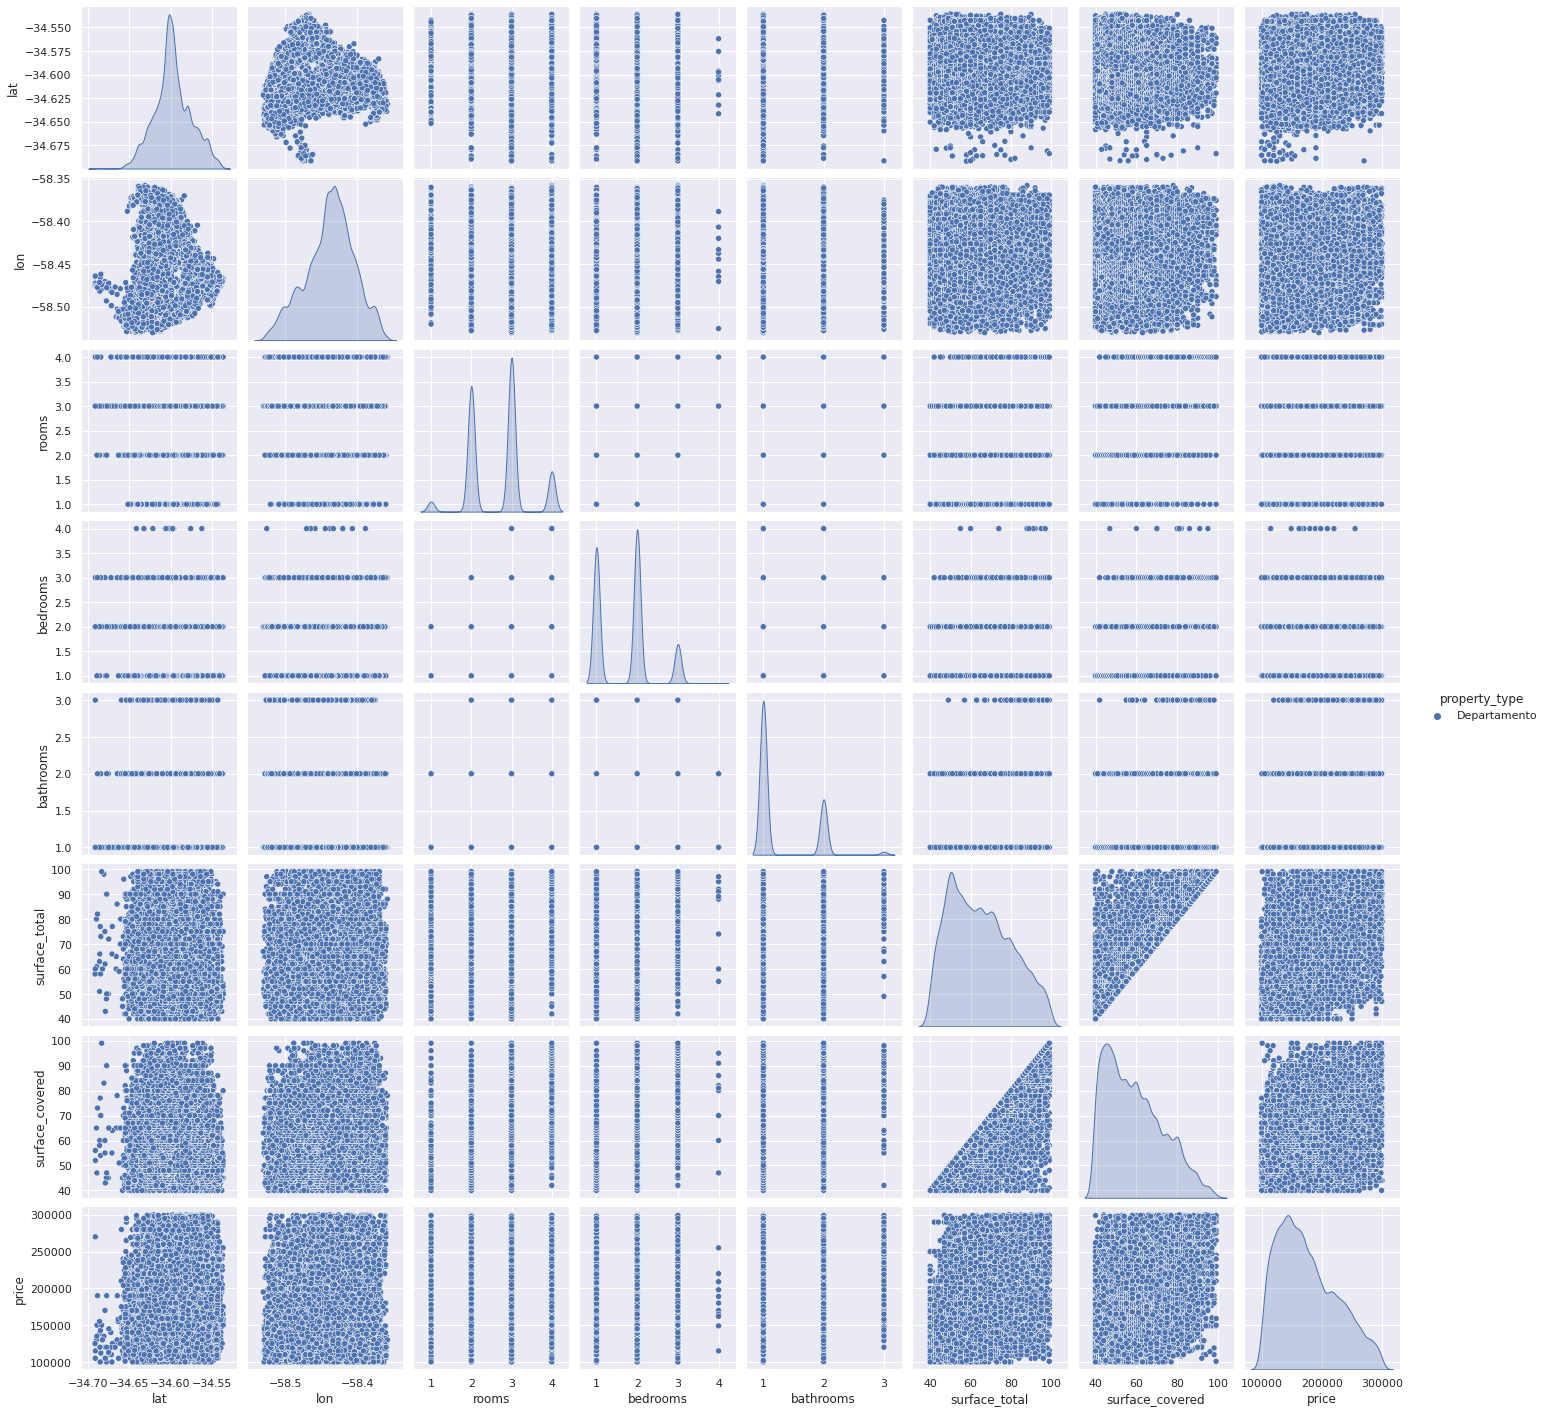

In [ ]:
#hacemos un pairplot para casas
sns.set()
sns.pairplot(datof, hue='property_type')

*Es importante resaltar que Departamento sigue representando un alto porcentaje de anuncios. Es posible encontrar diferentes precios de departamentos de hasta 300,000 dolares con cuartos de 1 hasta 3, con una alta probabilidad, mientras que en 4 cuartos es mas probable encontrar precios entre 150,000 y 200,000 dolares aproximadamente. Las habitaciones varian en un rango de 40 metros cuadrados hasta 100 metros cuadrados, sin excepcion alguna se podria encontrar un anuncio con las caracteristicas mencionadas.*

--------------------------------------------------------------------------------

*Casa*

In [ ]:
#observamos cuantas casas quedaron en el nuevo dataframe
casa3 = datos_prop_9[datos_prop_9['property_type'] == 'Casa']
casa3.shape

(220, 20)

*Analizamos como se comporta  precio y se correlaciona con las demas variables*

In [ ]:
#encontramos la matriz de correlacion para departamento
codatof= datof.corr()
codatof

lat       lon  ...  surface_covered     price
lat              1.000000 -0.123063  ...        -0.078772  0.256954
lon             -0.123063  1.000000  ...         0.113665  0.060114
rooms           -0.083454  0.059935  ...         0.714457  0.375455
bedrooms        -0.091467  0.064667  ...         0.725508  0.374112
bathrooms       -0.011180 -0.018884  ...         0.453347  0.416585
surface_total   -0.060165  0.057407  ...         0.903459  0.581357
surface_covered -0.078772  0.113665  ...         1.000000  0.549737
price            0.256954  0.060114  ...         0.549737  1.000000

[8 rows x 8 columns]

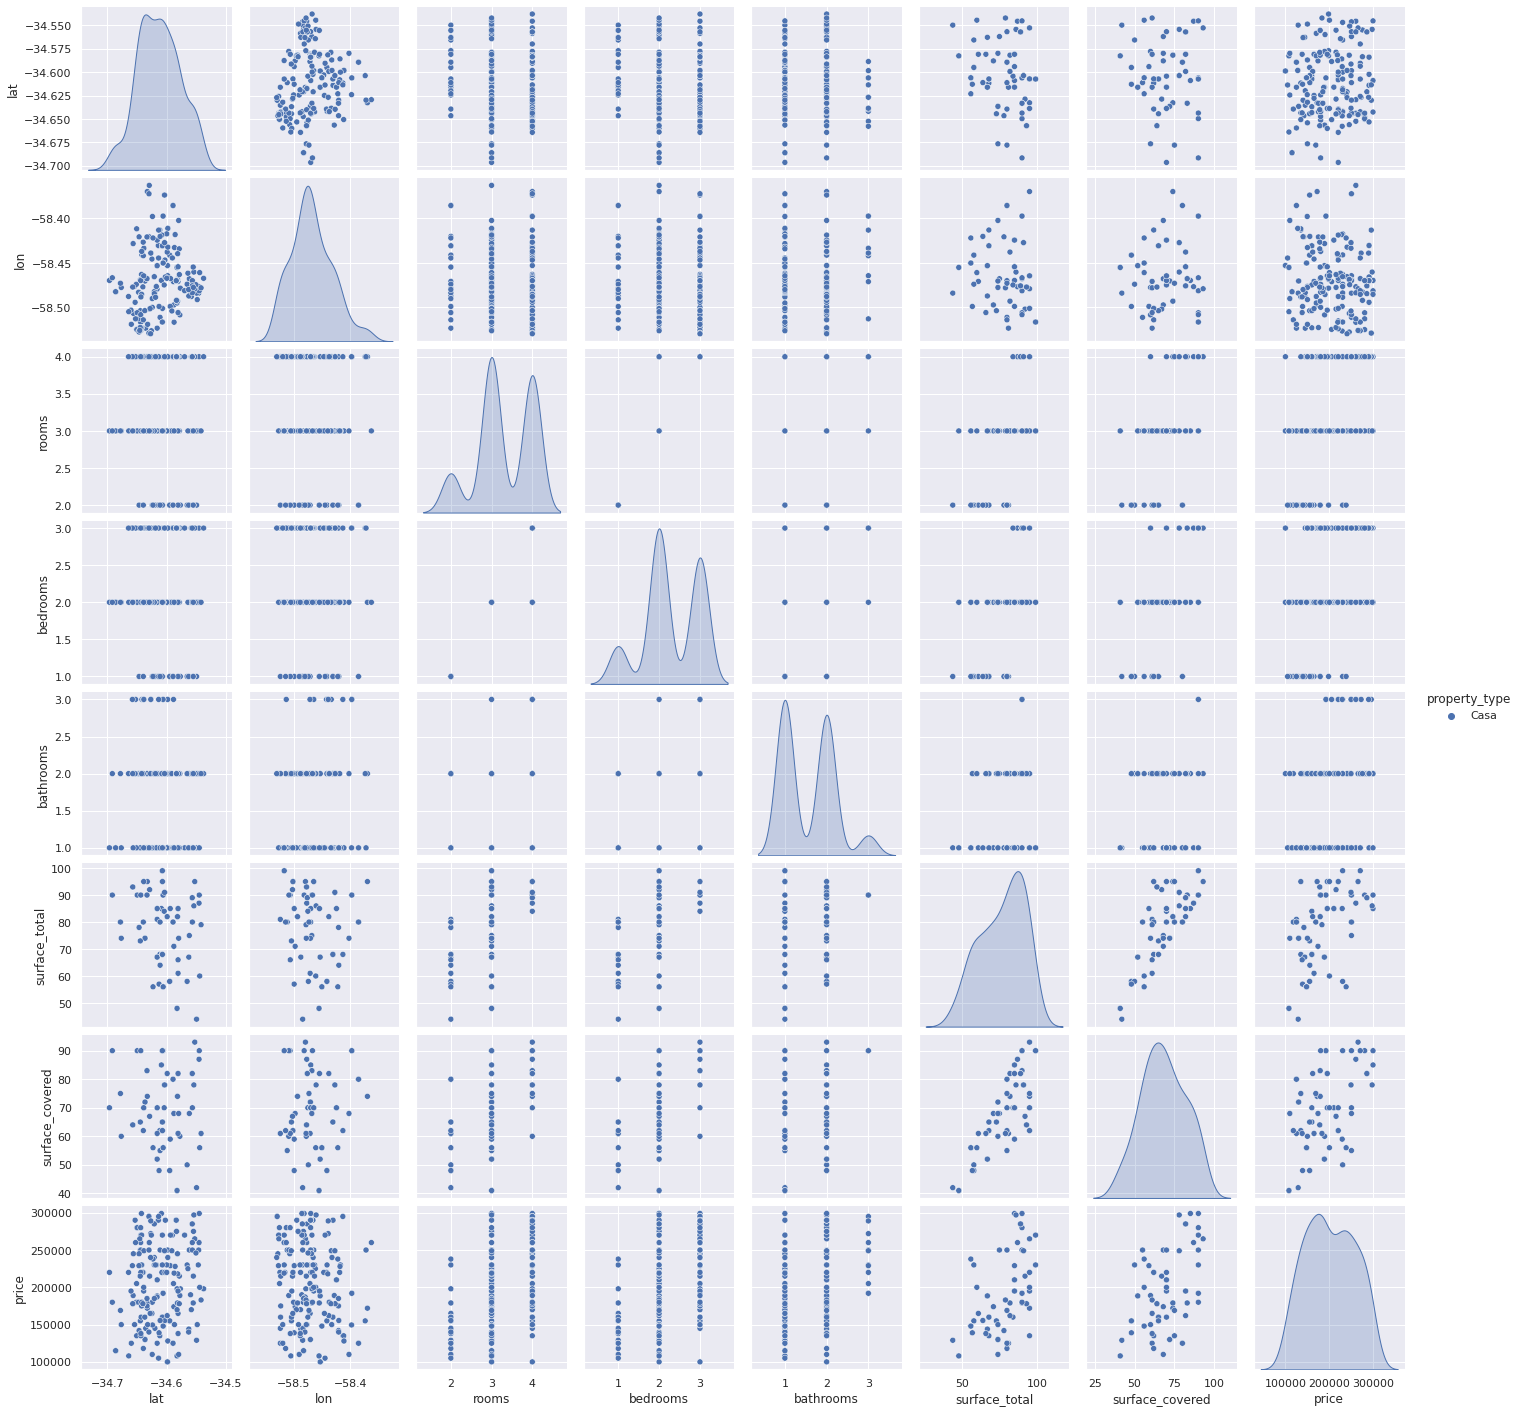

In [ ]:
#hacemos un pairplot para casas
sns.set()
sns.pairplot(casa3, hue='property_type')

*Se observa una disminucion representativa en la cantidad de datos para la propiedad casa, lo cual implica pocos anuncios y posiblemente el poco interes de las personas en vivir en casas dentro de capital federal.*
*Es posible encontrar una casa con 2 habitaciones con precios de 110,000 hasta 170,000 aproximadamente y una superficie entre 55 m2 y 70 m2. Adicionalmente, con 3 habitaciones hay mas posibilidades de encontrar anuncios con superficies por encima de 65 m2. Por ultimo, 4 habitaciones con precios superiores a 112,000 dolares y con superficies totales grandes que superan los 70 m2.*


--------------------------------------------------------------------------------

*PH*

In [ ]:
#observamos cuantos departamentos quedaron en el nuevo dataframe
casa4 = datos_prop_9[datos_prop_9['property_type'] == 'PH']
casa4.shape

(3361, 20)

*Analizamos como se comporta  precio y se correlaciona con las demas variables*

In [ ]:
#encontramos la matriz de correlacion para PH
cocasa4= casa4.corr()
cocasa4

lat       lon  ...  surface_covered     price
lat              1.000000 -0.024927  ...        -0.073767  0.282328
lon             -0.024927  1.000000  ...         0.095326  0.063386
rooms           -0.084824  0.144147  ...         0.627903  0.508771
bedrooms        -0.103522  0.143540  ...         0.625420  0.492274
bathrooms       -0.030472 -0.079479  ...         0.284877  0.229129
surface_total   -0.104177 -0.116888  ...         0.736671  0.499247
surface_covered -0.073767  0.095326  ...         1.000000  0.554301
price            0.282328  0.063386  ...         0.554301  1.000000

[8 rows x 8 columns]

*Analizamos como se comporta  precio y se correlaciona con las demas variables*

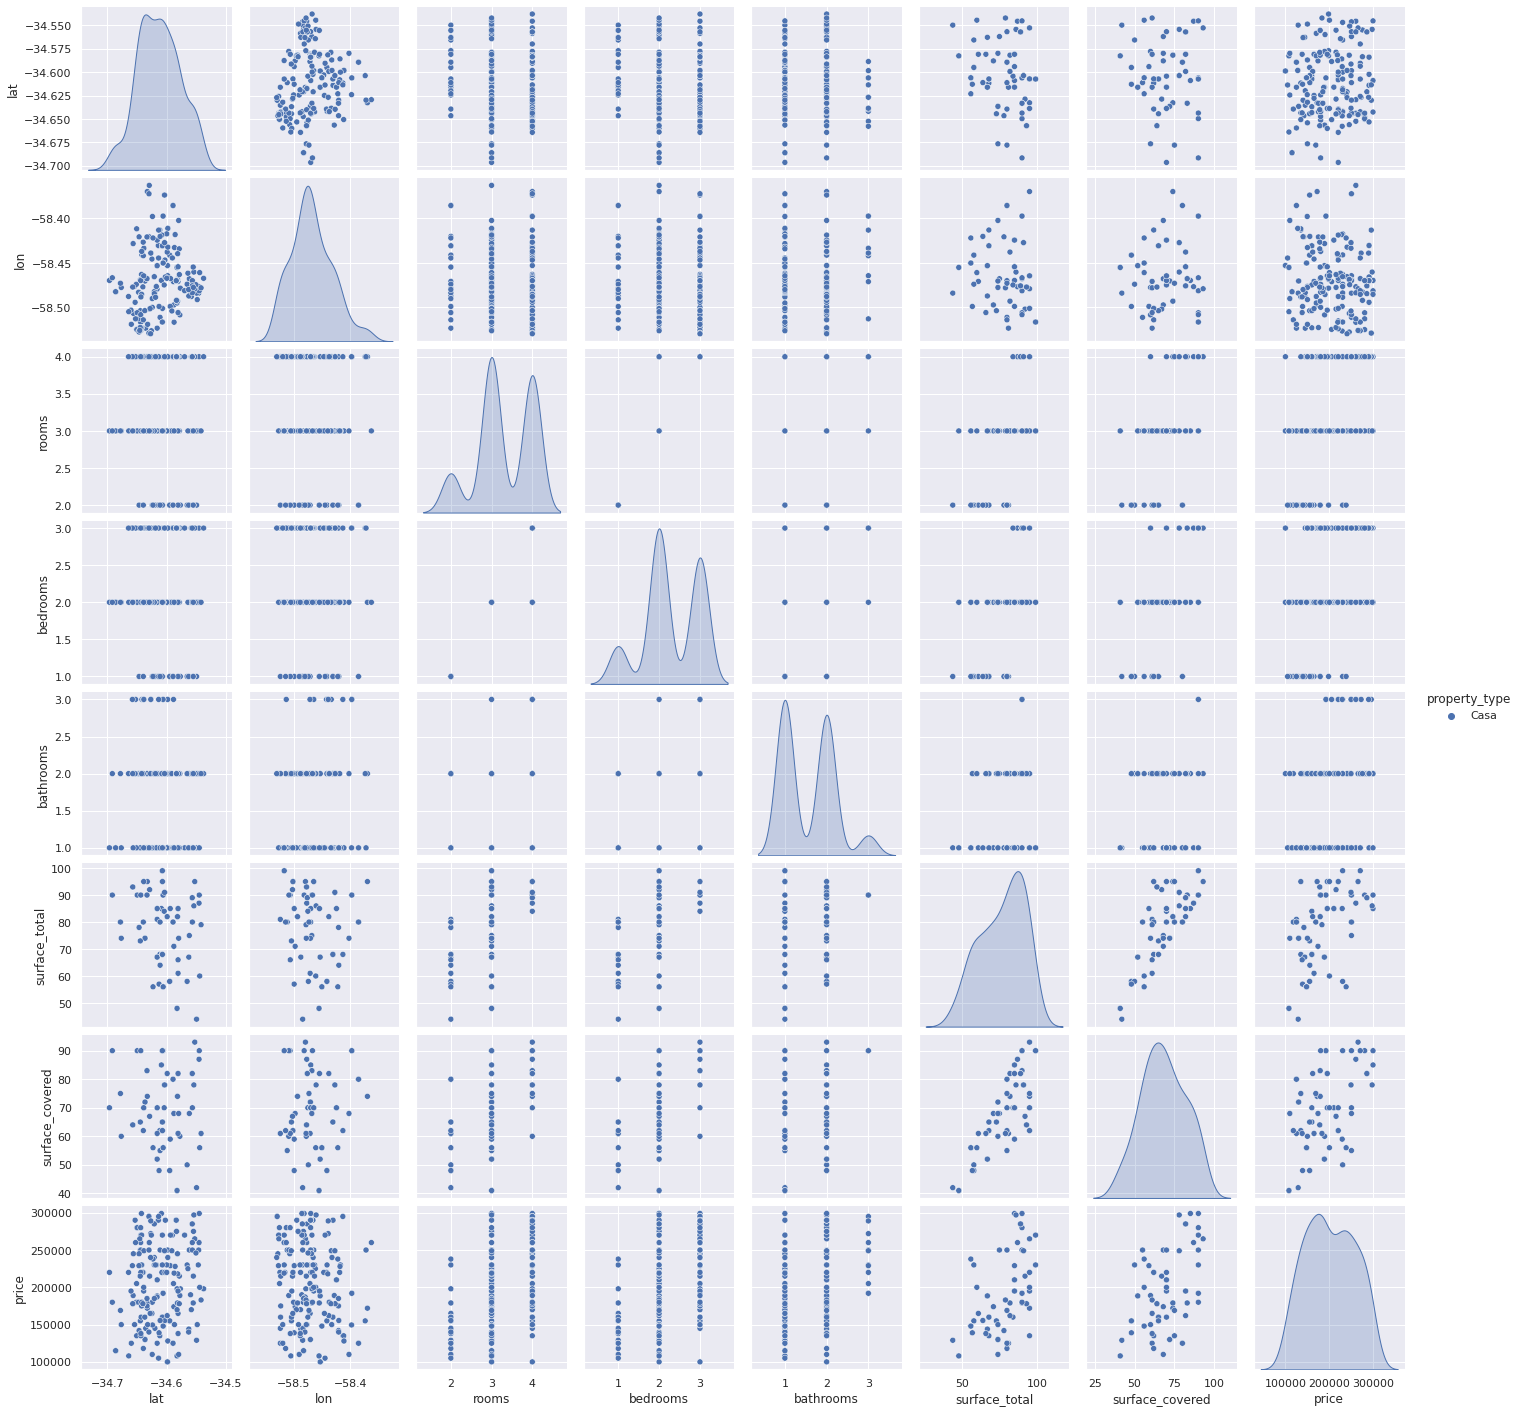

In [ ]:
#hacemos un pairplot para PH
sns.set()
sns.pairplot(casa3, hue='property_type')

*Para la propiedad casa es mas probable encontrar 3 habitaciones para un rango de precios de 100,000 dolares hasta 300,000 dolares. Para 2 habitaciones las superficies totales son menores desde 58 m2 hasta 70 m2 aproximadamente. asimismo, para 4 habitaciones se encuentran precios por encima de 150,000 dolares con superficies totales que superan los 80 m2.*
*Al analisar las variables precio y superficie total, es posible identificar una tendencia en los datos que crece a medida que aumenta la superficie.*

--------------------------------------------------------------------------------

### ***Procedemos a graficar usando la funcion pairplot de seaborn***

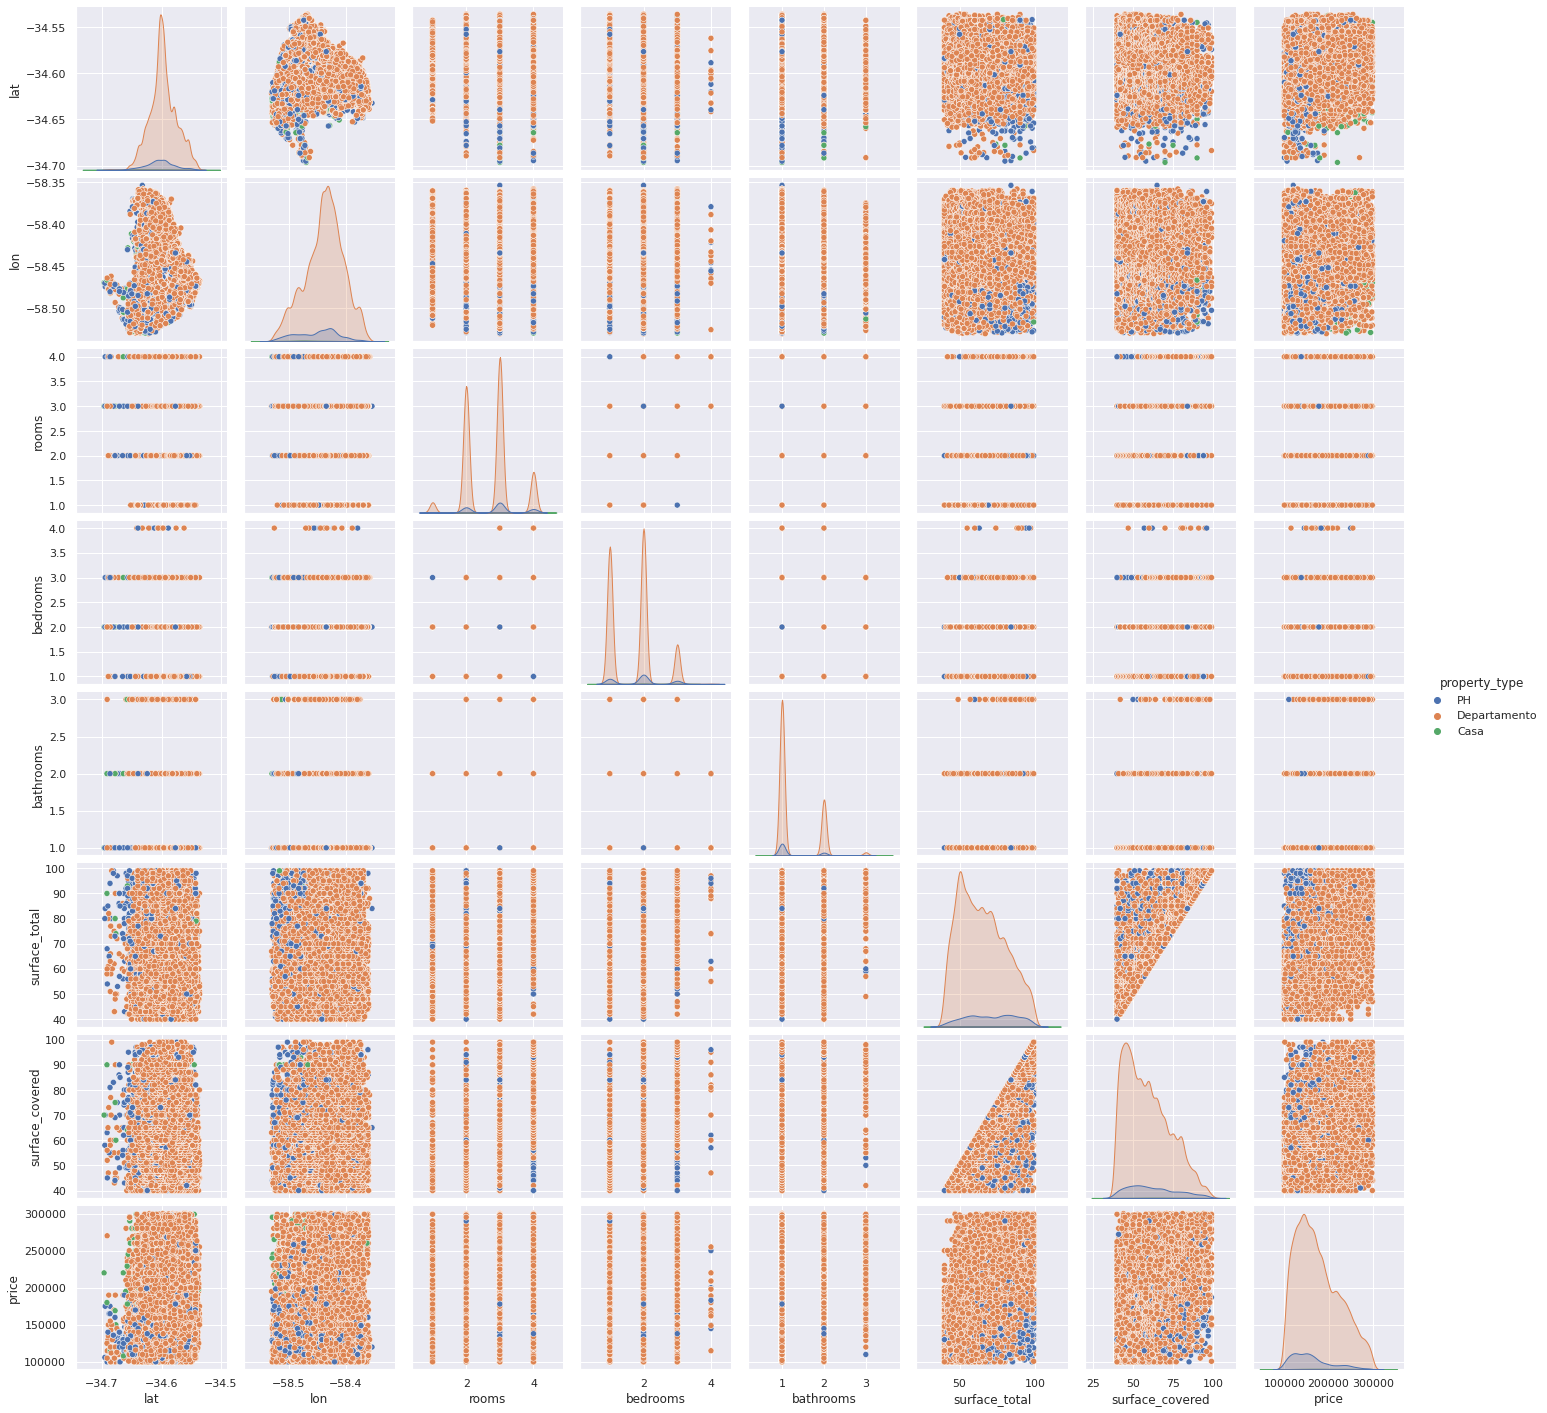

In [ ]:
sns.set()
sns.pairplot(datos_prop_9, hue='property_type')


*En las graficas de pairplot podemos identificar la distribucion de probabilidad la cual tiende a la derecha donde se concentra la mediana de los datos. La cantidad de anuncios para Departamento en porcentaje es evidente que opaca o cubre gran parte de las demas propiedades de casa y PH.*
*Hay un atributo en particular, donde se presentan 4 dormitorios y los datos se centralizan entre 150,000 dolares y 200,000 dolares, con superficies totales por encima de 80 m2, lo que significa que hay una gran posibilidad de encontrar un anuncio similar para los 3 tipos de propiedades.*

--------------------------------------------------------------------------------

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

***Analizamos nuevamente la tabla y el mapa de calor de correlacion***

In [ ]:
#encontramos la matriz de correlacion
corr1= datos_prop_9.corr()
corr1

lat       lon  ...  surface_covered     price
lat              1.000000 -0.100151  ...        -0.083901  0.259564
lon             -0.100151  1.000000  ...         0.100320  0.065554
rooms           -0.091552  0.052946  ...         0.707303  0.376707
bedrooms        -0.100158  0.058367  ...         0.716626  0.375667
bathrooms       -0.010373 -0.018926  ...         0.433637  0.408027
surface_total   -0.074592  0.022432  ...         0.886594  0.557760
surface_covered -0.083901  0.100320  ...         1.000000  0.539819
price            0.259564  0.065554  ...         0.539819  1.000000

[8 rows x 8 columns]

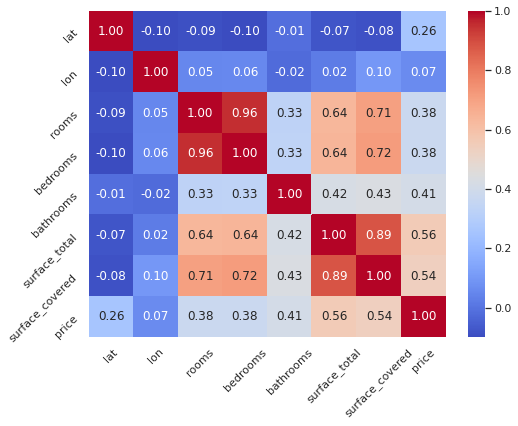

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr1, annot=True, fmt= '.2f',cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

*Despues de filtrar el dataset la correlación entre precio y superficie total aumenta considerablemente hasta 0.56. la correlacion entre precio y habitaciones es del 0.38. La correlacion entre precio y baños es de 0.41. La correlacion entre precio y superficie cubierta es de 0.54. La correlacion entre habitaciones y superficie cubierta es del 0.71.*


*Estas variables son las mas representativas para predecir el valor del tipo de propiedad.*

In [ ]:
cov= datos_prop_9.cov()
cov

lat         lon  ...  surface_covered         price
lat                0.000510   -0.000077  ...        -0.025872  2.839158e+02
lon               -0.000077    0.001152  ...         0.047117  1.078002e+02
rooms             -0.001488    0.001294  ...         7.174293  1.328537e+04
bedrooms          -0.001520    0.001332  ...         6.779705  1.231302e+04
bathrooms         -0.000111   -0.000303  ...         2.812061  9.505664e+03
surface_total     -0.025011    0.011427  ...       192.222093  4.132397e+05
surface_covered   -0.025872    0.047117  ...       199.847767  3.686816e+05
price            283.915834  107.800199  ...    368681.564262  2.372336e+09

[8 rows x 8 columns]

*La covariancia me confirma si las variables varian de forma conjunta. Para nuestro caso la variable precio tiene una relacion positiva con las variables: habitaciones, cuartos, baños, superficie total, superficie cubierta.*

*Si observamos detenidamente las demas variables tienden a cero, lo cual es un indicativo de que no pasa nada cuado una variable aumenta o disminuye, es decir que no hay relacion entre los atributos.*

--------------------------------------------------------------------------------

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
Dep = pd.read_csv('/content/driven/MyDrive/Colab Notebooks/datasets/datset apartamentos/DS_Proyecto_01_Datos_Properati.csv')



In [ ]:
lista_propiedades = ["Departamento","Casa","PH"]

lista = Dep.loc[Dep["property_type"].isin(lista_propiedades)]

### ***Para este caso se analizara la providendia mas baja*** 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'histograma de frecuencia vs tipo de propiedades')

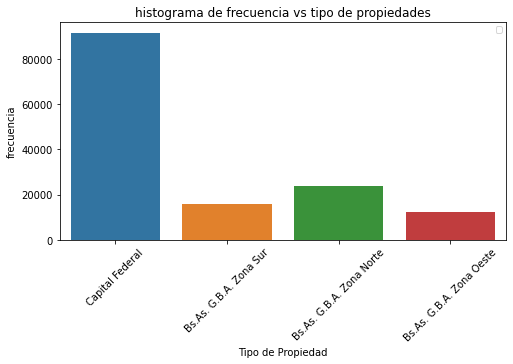

In [ ]:
#histograma de property_type
plt.figure(figsize=(8,4))


sns.countplot(data = lista  , x = 'l2')
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.ylabel('frecuencia')
plt.xlabel('Tipo de Propiedad')
plt.title('histograma de frecuencia vs tipo de propiedades')



*La provincia con menos anuncios es: Bs.As. G.B.A. Zona Oeste*

--------------------------------------------------------------------------------

### ***Graficos de caja***

In [ ]:
zonaoeste =  Dep[Dep['l2'] == "Bs.As. G.B.A. Zona Oeste"]

lista_propiedades = ["Departamento","Casa","PH"]

zonaoeste1 = zonaoeste.loc[zonaoeste["property_type"].isin(lista_propiedades)]
zonaoeste2 = zonaoeste1[zonaoeste1['price'] <= 500000]


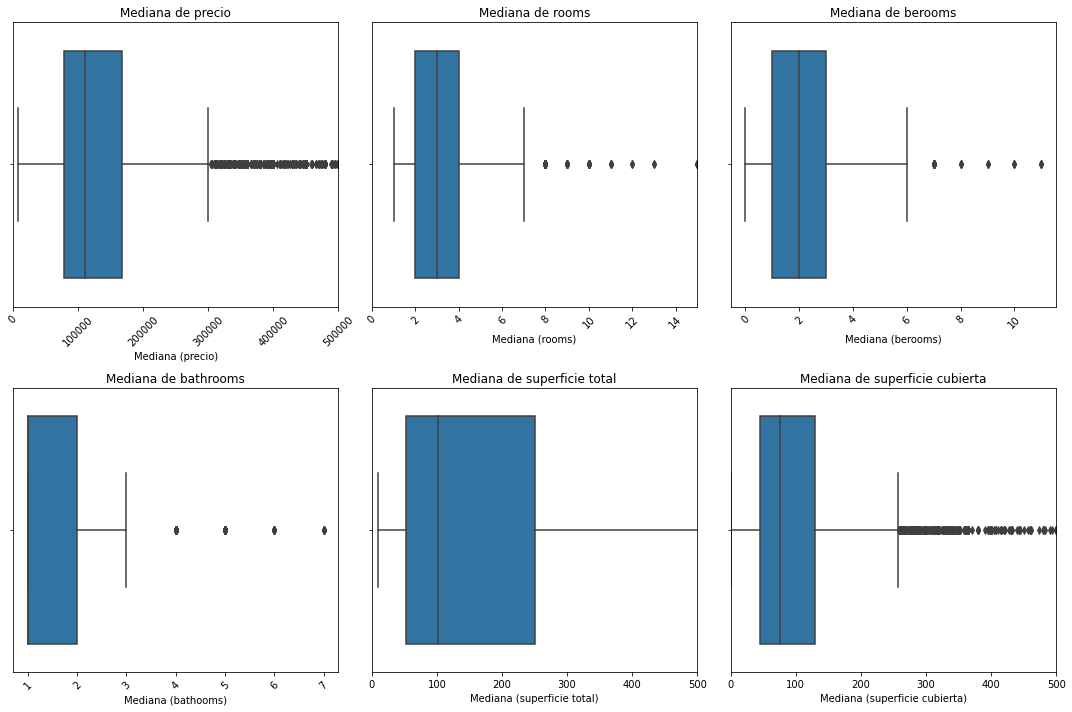

In [ ]:
#diagrama de caja 

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x ='price', data = zonaoeste2)
plt.xticks(rotation=45)
plt.xlim(000,500000)
plt.xlabel('Mediana (precio)')
plt.title('Mediana de precio') 



plt.subplot(2,3,2)
sns.boxplot(x='rooms', data = zonaoeste2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (rooms)')
plt.title('Mediana de rooms') 
plt.xlim(000,15)


plt.subplot(2,3,3)
sns.boxplot(x = 'bedrooms', data = zonaoeste2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (berooms)')
plt.title('Mediana de berooms') 


plt.subplot(2,3,4)
sns.boxplot(x = 'bathrooms', data = zonaoeste2)
plt.xticks(rotation=45)
plt.xlabel('Mediana (bathooms)')
plt.title('Mediana de bathrooms') 


plt.subplot(2,3,5)
sns.boxplot(x = "surface_total", data = zonaoeste2)
plt.xlim(0,500)
plt.xlabel('Mediana (superficie total)')
plt.title('Mediana de superficie total') 


plt.subplot(2,3,6)
sns.boxplot(x = "surface_covered", data = zonaoeste2)
plt.xlim(0,500)
plt.xlabel('Mediana (superficie cubierta)')
plt.title('Mediana de superficie cubierta') 

plt.tight_layout()
plt.show()

*Mediana del precio : el 50 % se encuentra en el rango entre 800,000 y 2,000,000 dolares, el otro 50 % son datos dispersos.*

*Mediana de Habitaciones: el 50 % de los datos se encuentran dentro del rango de 2 y 4 habitaciones.*

*Mediana de superficie total: el 50 % de los datos se encuentran en el rango entre 80 y 300 m2.*

--------------------------------------------------------------------------------

*Analizamos la frecuencia de los datos*

In [ ]:
#tabla de frecuencia de tipos de propiedades
frec = pd.value_counts(zonaoeste2['property_type'])
frec

Departamento    5566
Casa            4812
PH              1548
Name: property_type, dtype: int64

Text(0.5, 1.0, 'histograma de frecuencia vs tipo de propiedades')

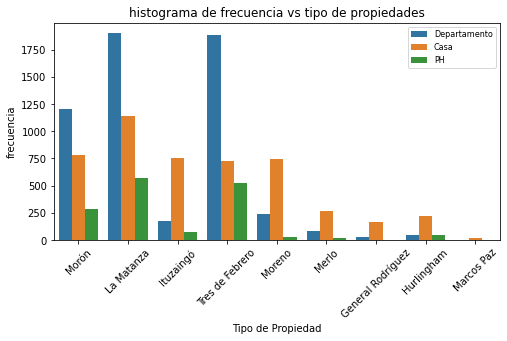

In [ ]:
#histograma de property_type
plt.figure(figsize=(8,4))


sns.countplot(data = zonaoeste2  , x = 'l3', hue='property_type')
plt.legend(loc = 'upper right', shadow = False,  fontsize = 'x-large', prop={'size': 8})
plt.xticks(rotation=45)
plt.ylabel('frecuencia')
plt.xlabel('Tipo de Propiedad')
plt.title('histograma de frecuencia vs tipo de propiedades')


*En el histograma se evidencia que el mayor numero de anuncios se encuentra ubicado en La Matanza y Tres de Febrero, siendo superior los 
Departamentos y casas. Moreno, no tiene la mayor cantidad de anuncios, pero es importante tenerlo en cuenta.
Marco Paz tiene el menor numero de anuncion, hay casas, PH, y departamentos en una minima cantidad.*

*Es posible determinar que por lo general los Departamentos predominan en mayor cantidad en diferentes barrios.*

--------------------------------------------------------------------------------

### ***Se analizan Los barrios de Zona Oeste vs precio***

Text(0.5, 22.20000000000004, 'Precio')

<Figure size 1440x864 with 0 Axes>

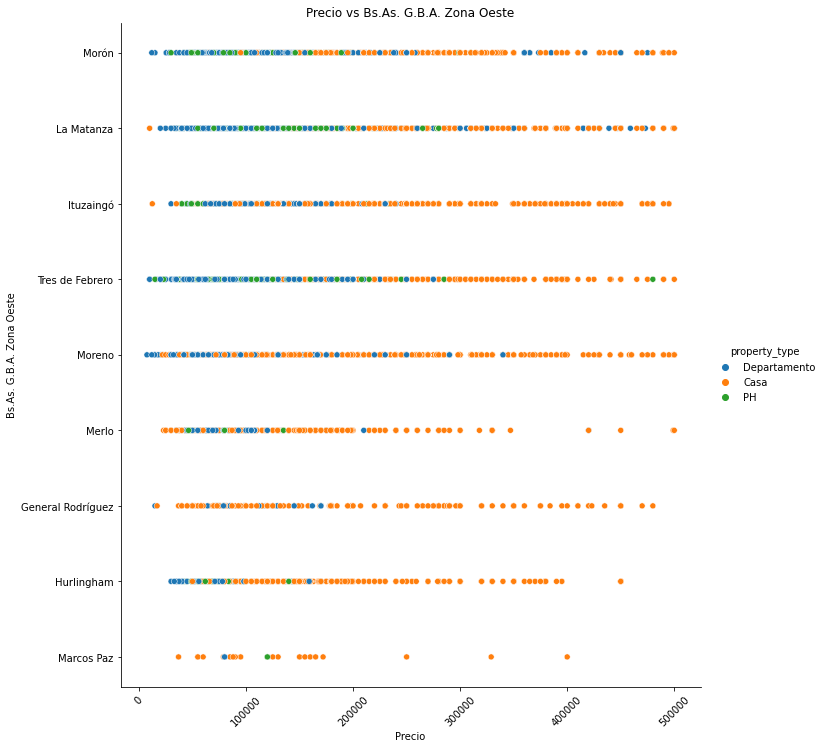

In [ ]:
plt.figure(figsize=(20,12))
sns.pairplot(zonaoeste2,y_vars=['l3'],x_vars=['price'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=45)
plt.title('Precio vs Bs.As. G.B.A. Zona Oeste')
plt.ylabel('Bs.As. G.B.A. Zona Oeste')
plt.xlabel('Precio')
#plt.xlim(0,12)
#plt.xlim(0,600000)

*La mayor cantidad de tipos de propiedades son los Departamentos y casas, que estan alrededor de toda la localidad. Esto es un indicativo de que la zona oeste es un tipo de urbanizacion, ademas, el numero de Departamentos es menor en precio respecto a las casas.* 

General Rodriguez, tiene la mayor cantidad de casas en la zona oeste, con precios exclusivos superiores a 3,000,000 dolares.

Moreno, apesar de no tener la mayor cantidad de anuncios, se observan varios precios que superan los 3,500,000 dolares.

Marco Paz, se puede apreciar que si existen PH y Departamentos tambien.

--------------------------------------------------------------------------------

(0.0, 2000.0)

<Figure size 1440x864 with 0 Axes>

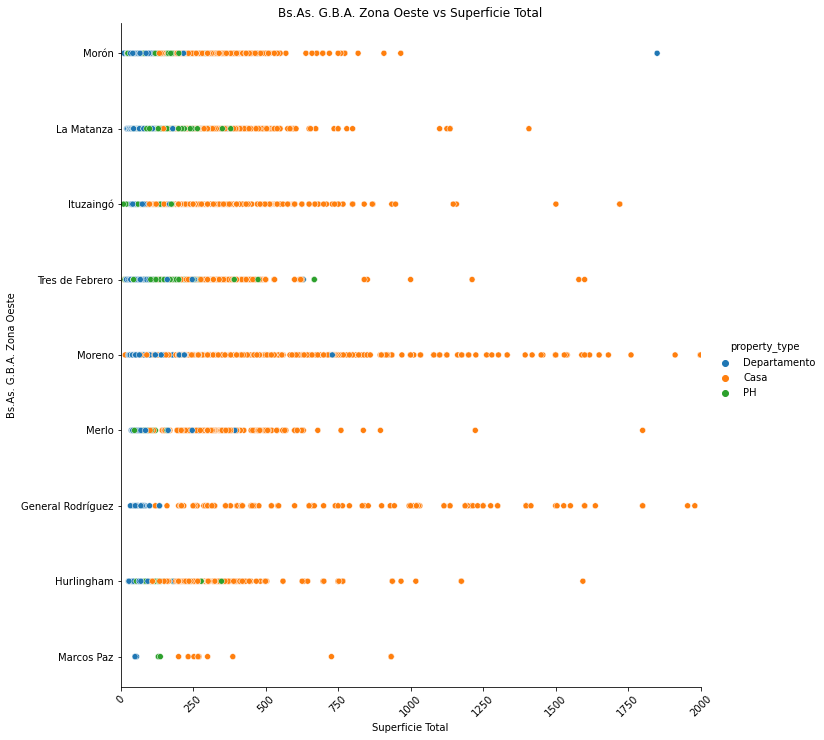

In [ ]:
plt.figure(figsize=(20,12))
sns.pairplot(zonaoeste2,y_vars=['l3'],x_vars=['surface_total'],hue='property_type', height=10)
plt.ticklabel_format(style='plain', axis='x') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=45)
plt.title('Bs.As. G.B.A. Zona Oeste vs Superficie Total')
plt.ylabel('Bs.As. G.B.A. Zona Oeste')
plt.xlabel('Superficie Total')
#plt.xlim(0,12)
plt.xlim(0,2000)

*En el siguiente grafico, se puede observar que es mas posible encontrar en Moreno y General Rodriguez casas con mayor superficie total, mayor a 1000 m2, que en los otros barrios de zona oeste.*

*Los departamentos tienden a presentar menor superficie total, en este caso menor precio en comparacion con las casas (< 250 m2).*

--------------------------------------------------------------------------------

In [ ]:
# Cargar la capa temática
import geopandas as gpd
import matplotlib.pyplot as plt
df_geo3  = gpd.GeoDataFrame(zonaoeste2, geometry=gpd.points_from_xy(zonaoeste2.lon, zonaoeste2.lat))


In [ ]:

df_geo4  = df_geo3.dropna()


In [ ]:
df_geo5  = gpd.GeoDataFrame(df_geo4, geometry=gpd.points_from_xy(df_geo4.lon, df_geo4.lat))
df_geo5.head(2)

start_date    end_date  ... operation_type                     geometry
96  2019-10-17  2019-12-23  ...          Venta  POINT (-58.51129 -34.69610)
97  2019-10-17  2020-02-21  ...          Venta  POINT (-58.55881 -34.64631)

[2 rows x 20 columns]

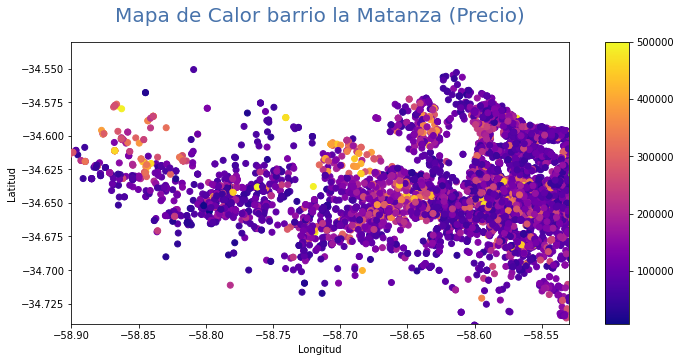

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-58.9, -58.53, -34.74, -34.530])
 
# Control del título y los ejes
ax.set_title('Mapa de Calor barrio la Matanza (Precio)', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
 
# Generar y cargar el mapa
df_geo5.plot(column='price', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5, categorical = False)
#df_geo3.plot(column='l2', cmap='coolwarm', ax=ax,
             # legend=True, cax=cax, zorder=0)#e7f0e6

# Cargar un mapa base con contornos de países
barrios = "/content/driven/MyDrive/Colab Notebooks/datasets/comunas.csv"
map_barrios = gpd.read_file(barrios)
map_barrios.plot(ax=ax, color='#727375', zorder=0)

*Se observa el comportamiento del precio en zona oeste, La distribucion es mas homogenea en comparacion a capital federal. Los mayores precios estan alrededor de todos los barrios. Lo que concluye en que es posible encontrar anuncios desde el menor precio hasta el mayor precio. No es posible determinar que clase de lujos corresponden a cada casa, como el estrato, lo cual lo hace una variable importante que se podria utilizar.*

--------------------------------------------------------------------------------

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree

*Cargamos el dataset*

In [ ]:
from google.colab import drive 
drive.mount('/content/driven/')

Mounted at /content/driven/


In [ ]:
Depa = pd.read_csv('/content/driven/MyDrive/Colab Notebooks/datasets/datset apartamentos/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
#analisamos las dimensiones
Depa.shape

(146660, 19)

***Filtramos el dataset***

In [ ]:
#filtramos por la region capital federal
capital = ["Capital Federal"]
Depas = Depa.loc[Depa['l2'].isin(capital)] 


In [ ]:
Depas.shape

(92539, 19)

In [ ]:
#Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
#creamos un nuevo dataset s
lista_propiedades = ["Departamento","PH","Casa"]

Depa1 = Depas.loc[Depas["property_type"].isin(lista_propiedades)]


In [ ]:
Depa1.shape

(91485, 19)

In [ ]:
#seleccionamos la superficie total que sea menos a 1000 y mayor a 15
Depa2 = Depa1[(Depa1.surface_total >= 15) & (Depa1.surface_total <= 1000)]

In [ ]:
Depa2.shape

(82405, 19)

In [ ]:
#seleccionamos propiedades cuyo precio sea menor a 4,000,000 
Depa3 = Depa2[(Depa2.price <= 4000000)]

In [ ]:
Depa3.shape

(82373, 19)

In [ ]:
Depa4 = Depa3.iloc[:, [8,9,10,11,12,13]]

In [ ]:
Depa4.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price
0    7.0       7.0        2.0          140.0            140.0  153000.0
1    2.0       1.0        2.0           70.0             58.0  159000.0
2    2.0       1.0        1.0           45.0             45.0  125000.0
3    2.0       1.0        1.0           85.0             50.0  295000.0
5    2.0       1.0        1.0           56.0             56.0  150000.0

In [ ]:
Depa4.isna().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [ ]:
Depa5 = Depa4.dropna()

In [ ]:
Depa5

rooms  bedrooms  bathrooms  surface_total  surface_covered      price
0         7.0       7.0        2.0          140.0            140.0   153000.0
1         2.0       1.0        2.0           70.0             58.0   159000.0
2         2.0       1.0        1.0           45.0             45.0   125000.0
3         2.0       1.0        1.0           85.0             50.0   295000.0
5         2.0       1.0        1.0           56.0             56.0   150000.0
...       ...       ...        ...            ...              ...        ...
146554    4.0       3.0        3.0          175.0            111.0   570000.0
146555    3.0       2.0        2.0          144.0            134.0   480000.0
146556    4.0       2.0        2.0          317.0            143.0   530000.0
146557    3.0       2.0        2.0          145.0            145.0   420000.0
146558    4.0       3.0        5.0          220.0            210.0  1470000.0

[81019 rows x 6 columns]

***Analisamos la correlacion con el filtrado propuesto***

In [ ]:
Depa5.corr()

rooms  bedrooms  ...  surface_covered     price
rooms            1.000000  0.925604  ...         0.304407  0.479972
bedrooms         0.925604  1.000000  ...         0.291140  0.442418
bathrooms        0.601887  0.605002  ...         0.275936  0.638737
surface_total    0.725799  0.695523  ...         0.375749  0.686459
surface_covered  0.304407  0.291140  ...         1.000000  0.298212
price            0.479972  0.442418  ...         0.298212  1.000000

[6 rows x 6 columns]

*Aumentó la correlacion entre precio y superficie total. Por otra parte las demas variables no variaron mucho respecto a otros atributos.*

--------------------------------------------------------------------------------

### ***Metodos de prediccion***

*Es de notar que la variable a predecir no es de un problema de clasificacion, sino, que la variable dependiente sera tratado como un problema de regresion. Por lo tanto se usaran modelos como tree regressor, knn regressor, linear regressor.*

*Una manera de saber si un modelo es bueno o malo es comparandolo con otros modelos y establacer metricas de evaluacion, para un problema de regresion.*

Para nuestro caso vamos a usar cuatro metricas diferentes:

La metrica de evaluacion RMSE o error cuadratico medio, la cual da como resultado el ajuste absoluto del modelo a los datos, es decir, cuan cerca estan los puntos de datos observados de los valores predichos del modelo. Cuanto mayor sea este valor, peor es el modelo. Para nuestro caso se esperan valores muy altos, debido a que la variable a predecir alcanza un rango de millones. Adicionalmente, esta metrica es util para comparar las variables de salida Ytrain y Ypredichos, bajo las mismas unidades.

MSE mide el error cuadrado promedio de las predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Cuanto mayor sea este valor, peor es el modelo. 

El r2  se utiliza con fines descriptivos y muestra que tan bien las variables independientes seleccionadas explican la variabilidad en sus variables dependientes. Este disminuira a medida que se agreguen predictores, si el aumento en el ajuste del modelo no compensa las perdidas de grados de libertad. En este caso el 1 significa prediccion prefecta. 

Por otro lado, el r2 ajustado, el cual mejorará si se agregan los terminos utiles, y disminuira si se agregan predictores menos utiles. Este modelo siempre debe ser usado con mas de una variable de prediccion.

### ***modelo arbol***

In [ ]:
features = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
target = 'price'

In [ ]:
X = Depa5[features]
y = Depa5[target]

### ***Modelo arbol de decision - treeRegressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

***Dividimos los datos en test y train para ser evaluados en los modelos de regresion de arbol, knn, y lineal.***

En principio se puede pensar en dividir los datos en un 70% (train) y 30% (test). Con el conjunto de datos de entrenamiento se ajusta el modelo de aprendizaje. Con el conjunto de datos de testeo se realizan predicciones para asi compararlos con los valores esperados.
Por ultimo fijamos un random_state, para que de esta manera mantenga la misma aleatoriedad de nuestro split.

¡Ojo! que no siempre se pueden dividir entre testeo y train, todo depende del volumen de datos que tengamos en nuestro dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


***Analisamos cual es el mejor numero de profundidad para el arbol***

Rapidamente podemos variar nuestra profundidad para analizar de manera intuitiva el mejor hiperparametro.

Modelo: 1
Raíz del error cuadrático medio en Train: 234569.00871177975
Raíz del error cuadrático medio en Test: 236555.76502517815
La profundidad del arbol es: 1
r cuadrado =  0.38118518799955126 
r cuadrado ajustado =  0.3811469956839969


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


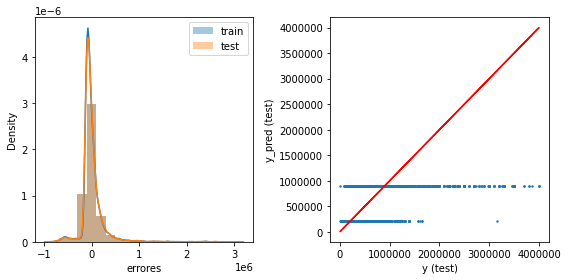

Modelo: 2
Raíz del error cuadrático medio en Train: 206608.3616898628
Raíz del error cuadrático medio en Test: 209013.62022782397
La profundidad del arbol es: 2
r cuadrado =  0.5190000690992735 
r cuadrado ajustado =  0.5189703825100285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


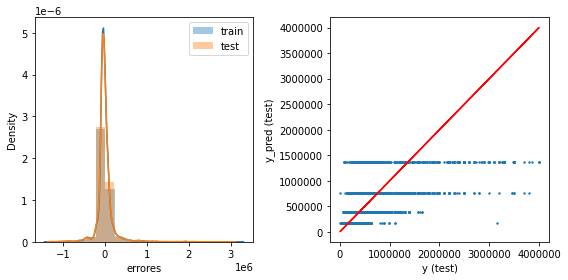

Modelo: 3
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327
La profundidad del arbol es: 3
r cuadrado =  0.5846736435442443 
r cuadrado ajustado =  0.5846480102288224


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


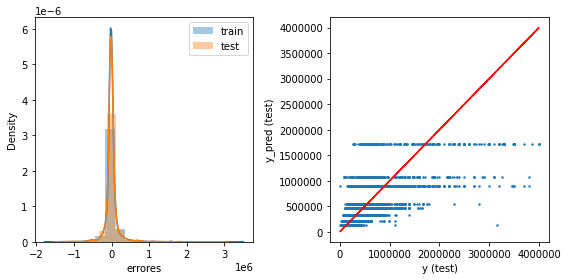

Modelo: 4
Raíz del error cuadrático medio en Train: 178947.60749154066
Raíz del error cuadrático medio en Test: 183592.64362839411
La profundidad del arbol es: 4
r cuadrado =  0.6360357207099174 
r cuadrado ajustado =  0.6360132573843222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


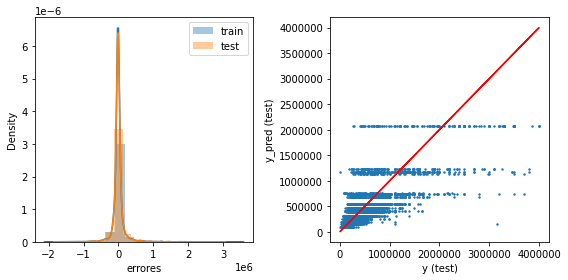

Modelo: 5
Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676
La profundidad del arbol es: 5
r cuadrado =  0.6737183920300405 
r cuadrado ajustado =  0.673698254422004


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


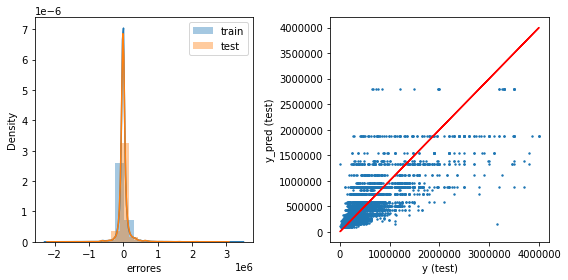

In [ ]:
from sklearn.metrics import mean_squared_error

# Definimos la lista de valores de k que vamos a explorar
n_tree = [1,2,3,4,5]

# Generamos en loop sobre los distintos valores de k 
for k in n_tree:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_regressor = DecisionTreeRegressor(max_depth=k)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)

    print(f'Modelo: {k}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('La profundidad del arbol es:', k)

    yhat = tree_regressor.predict(X)
    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r cuadrado = ', r_squared,'\n' 'r cuadrado ajustado = ',adjusted_r_squared)

    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(y_test, y_test, color = 'red')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    

    
    plt.tight_layout()
    plt.show()

*Una posible mejor profundidad, se encuentra en un valor de 4. Es evidente que a mayor n_tree, el valor de r2 y r2 ajustado aumentaran. Sin embargo empezaremos a perder interpretabilidad en el modelo*

In [ ]:
#creamos un modelo de arbol de decisiones
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=4)

In [ ]:
 #entrenamos el modelo de arbol de decisiones
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#predecimos las etiquetas sobre el conjunto train y test
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

***veamos que aprendio el arbol***

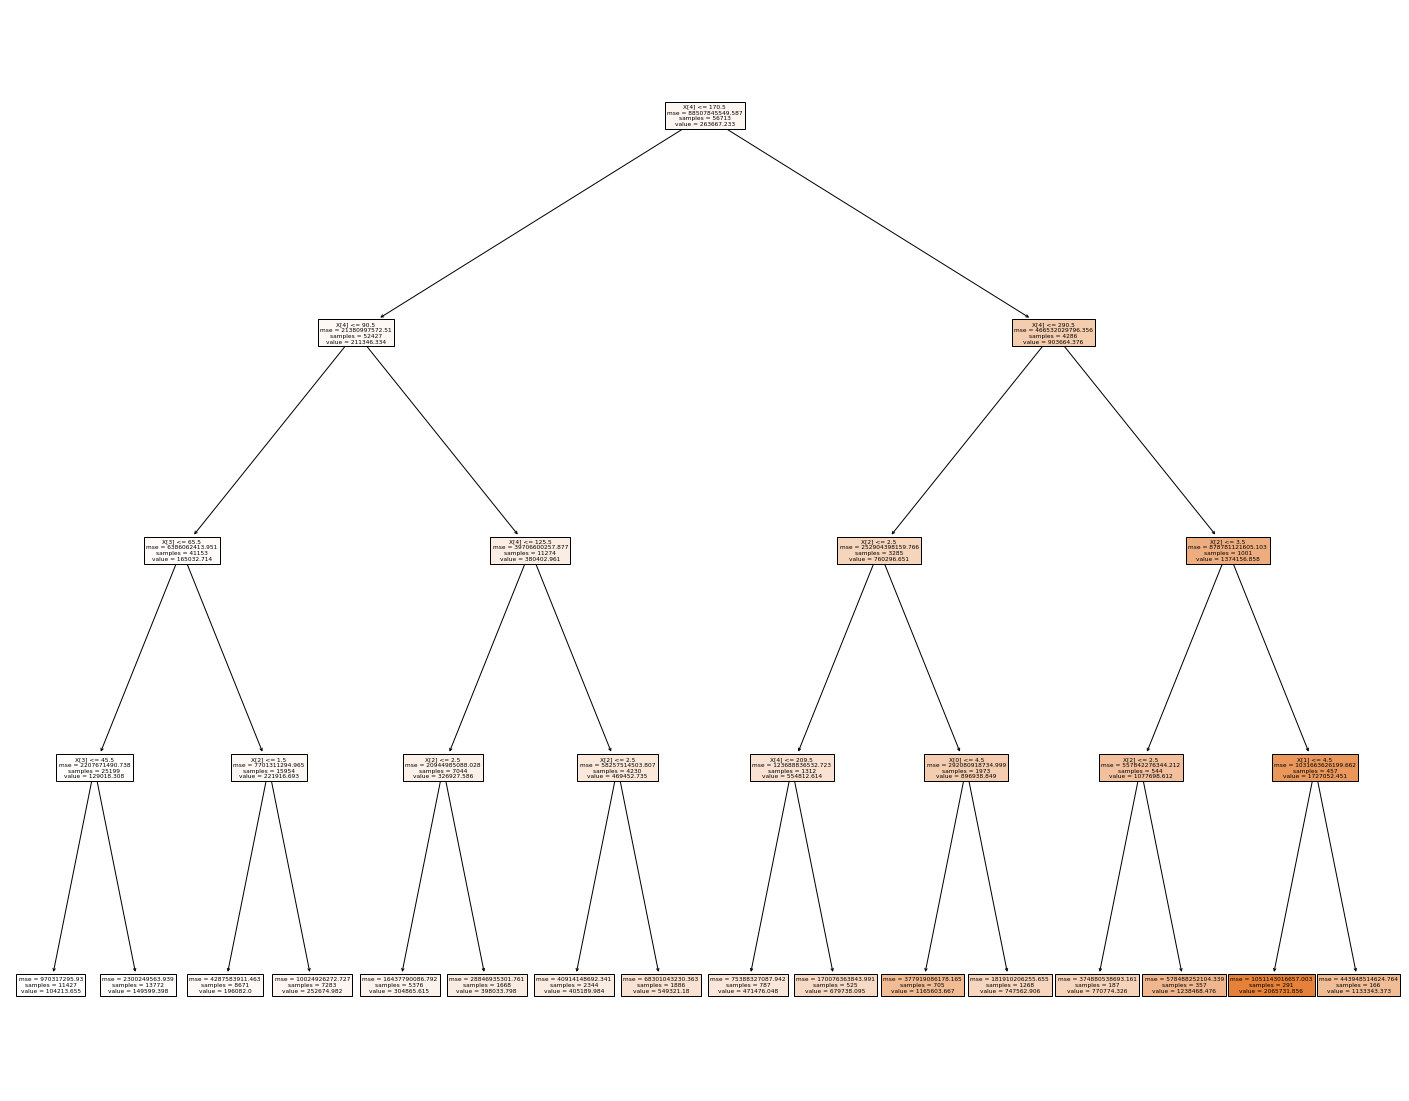

In [ ]:
if tree_regressor.max_depth < 6:
    plt.figure(figsize = (25,20))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

***evaluamos el modelo***

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 178947.60749154066
Raíz del error cuadrático medio en Test: 183592.64362839411
error cuadratico medio de Test :  85463.42146236045
r2 en Train es :  0.6381987830784361
r2 en Test es :  0.631147022914002


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


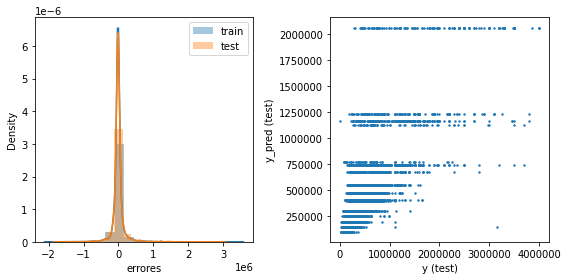

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
modelos = ['Árbol de Decisión']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('error cuadratico medio de Test : ',mean_absolute_error(y_test, y_test_pred))
    print('r2 en Train es : ', r2_score(y_train,y_train_pred, ))
    print('r2 en Test es : ', r2_score(y_test,y_test_pred))
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    #ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
    plt.show()
    

In [ ]:
# compute with formulas from the theory
yhat = tree_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r cuadrado = ', r_squared,'\n' 'r cuadrado ajustado = ',adjusted_r_squared)


r cuadrado =  0.6360357207099174 
r cuadrado ajustado =  0.6360132573843222


### ***Modelo KNN***

***Verificamos el mejor numero de vecinos***

Rapidamente podemos variar nuestro valor de vecinos mas cercanos para analizar de manera intuitiva el mejor hiperparametro.

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 77925.75966409931
Raíz del error cuadrático medio en Test: 161757.0594819361
el valor de vecinos es: 1
0.8646034823140449 0.8645951258454728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


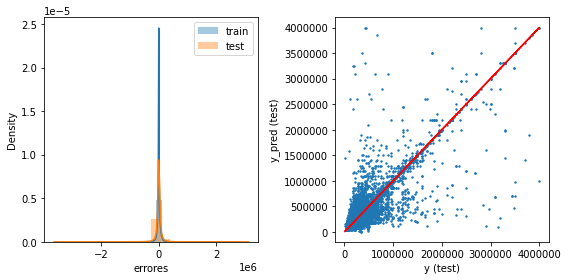

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 92435.07024633957
Raíz del error cuadrático medio en Test: 153607.76698581807
el valor de vecinos es: 2
0.8538699595705102 0.853860940645126


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


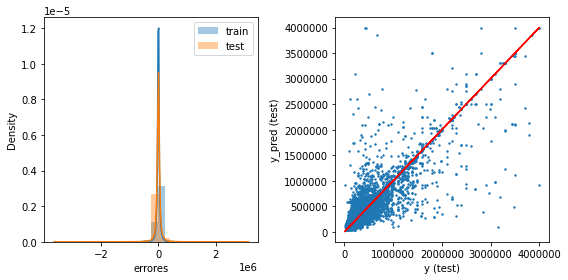

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234
el valor de vecinos es: 3
0.8377196452439869 0.8377096295455955


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


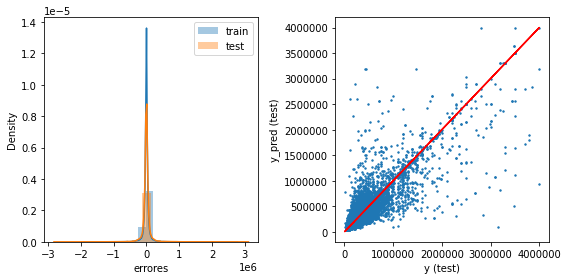

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 114297.26298367885
Raíz del error cuadrático medio en Test: 153695.14678737795
el valor de vecinos es: 4
0.8183795542137935 0.8183683448741945


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


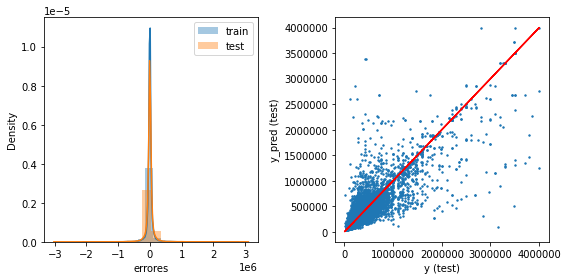

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459
el valor de vecinos es: 5
0.8040627934213886 0.8040507004729373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


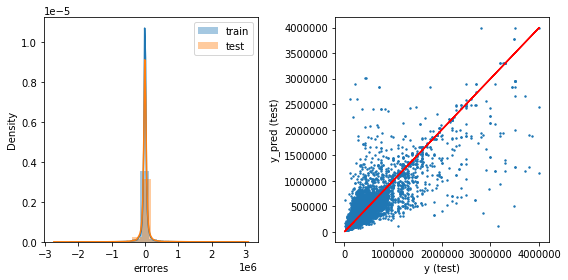

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 126981.09916190249
Raíz del error cuadrático medio en Test: 157103.70349400415
el valor de vecinos es: 6
0.7908530657844983 0.7908401575516089


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


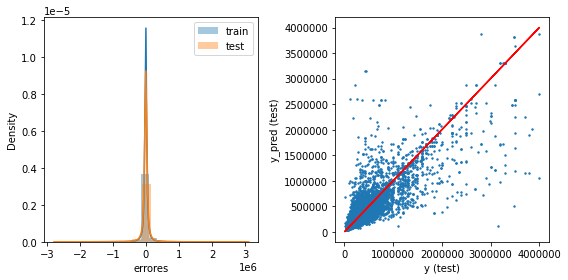

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 131893.26390701914
Raíz del error cuadrático medio en Test: 158496.1413147113
el valor de vecinos es: 7
0.7794177148035009 0.7794041007980205


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


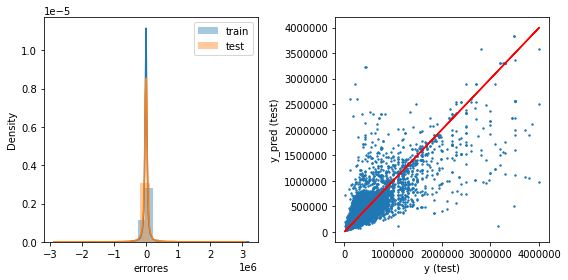

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 135799.4510120079
Raíz del error cuadrático medio en Test: 159931.45447015658
el valor de vecinos es: 8
0.7696932867340492 0.769679072551556


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


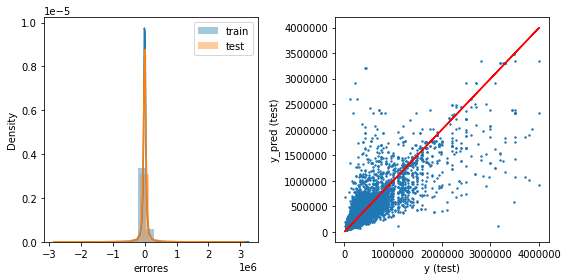

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 139143.29990459137
Raíz del error cuadrático medio en Test: 160067.65212340542
el valor de vecinos es: 9
0.762345975124281 0.7623313074768123


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


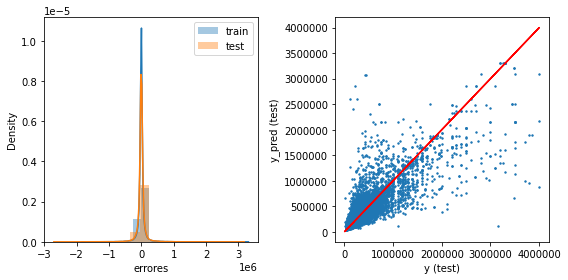

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 142074.1381975396
Raíz del error cuadrático medio en Test: 161749.10186897055
el valor de vecinos es: 10
0.7540738786634353 0.754058700474667


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


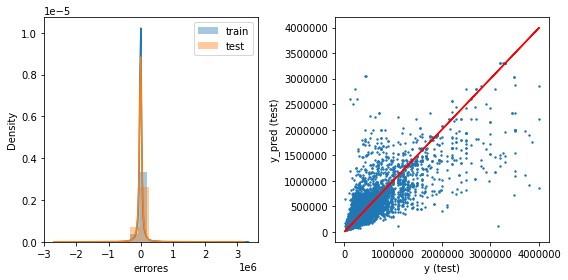

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 151504.10749090576
Raíz del error cuadrático medio en Test: 166151.87626387543
el valor de vecinos es: 15
0.727543686399957 0.7275268708077929


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


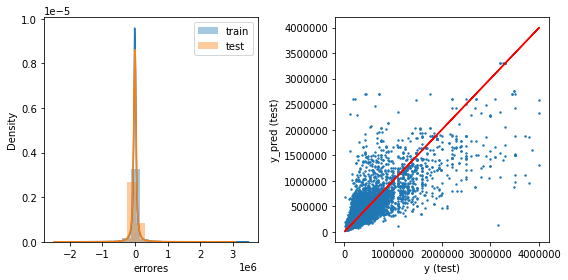

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 157270.19222071065
Raíz del error cuadrático medio en Test: 168471.41876337957
el valor de vecinos es: 20
0.7109929116650376 0.7109750745840546


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


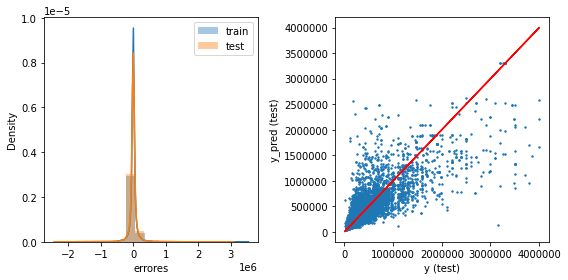

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 161593.98892841372
Raíz del error cuadrático medio en Test: 171964.3658152238
el valor de vecinos es: 25
0.6962023717409588 0.6961836218101909


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


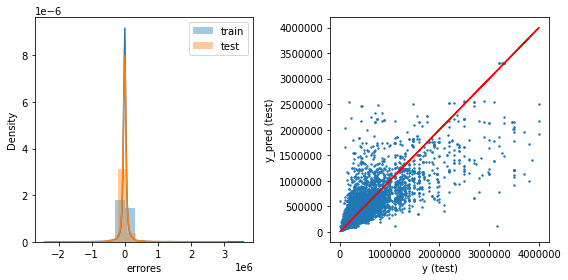

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 165183.31181074918
Raíz del error cuadrático medio en Test: 175031.1771367083
el valor de vecinos es: 30
0.6834431893940965 0.6834236519858654


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


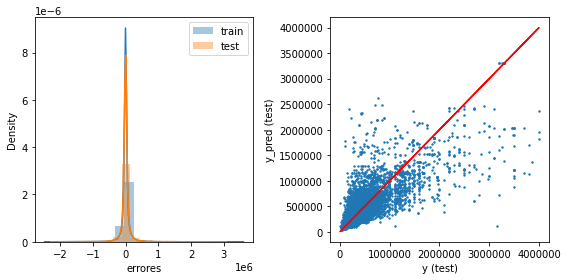

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 168782.3003693135
Raíz del error cuadrático medio en Test: 177032.01387150504
el valor de vecinos es: 35
0.671664266311342 0.6716440019257688


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


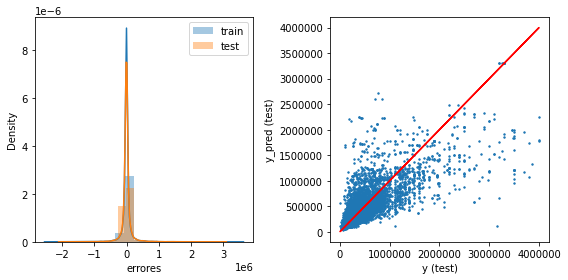

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 171561.16885694434
Raíz del error cuadrático medio en Test: 178972.4797348821
el valor de vecinos es: 40
0.6619374778529428 0.661916613144677


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


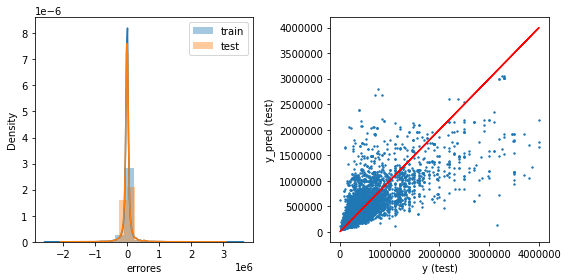

Modelo: Vecinos mas cercanos (KNN)
Raíz del error cuadrático medio en Train: 176265.36360904493
Raíz del error cuadrático medio en Test: 183792.61746099347
el valor de vecinos es: 50
0.643251722323402 0.6432297043585274


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


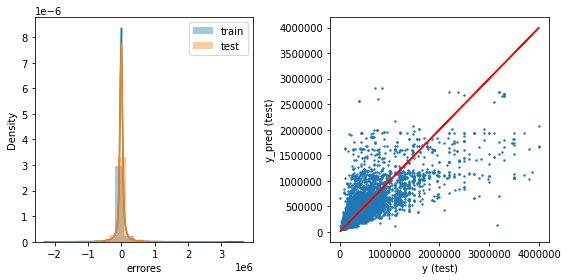

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)

    
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)


    print(f'Modelo: Vecinos mas cercanos (KNN)')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('el valor de vecinos es:', k)
    
    yhat = knn_regressor.predict(X)

    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(r_squared, adjusted_r_squared)

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(y_test, y_test, color = 'red')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    

    
    plt.tight_layout()
    plt.show()

*Un posible mejor numero de vecinos se encuentra en knn = 5, es posible notar despues de este valor, el r2 y r2 ajustado empiezan a disminuir, lo cual podria ser un indicativo de que el modelo empieza a sobreajustar nuestros datos, y deja de predecir correctamente*

In [ ]:
#Creamos un modelo de vecino más cercanos
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
#entrenamos el modelo KNN

knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
#predecimos las etiquetas sobre el conjunto train y test

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

***Evaluamos el modelo***

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459
error cuadratico medio de Test :  61921.19480786637
r2 en Train es :  0.8337576939918325
r2 en Test es :  0.7369544202301519


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


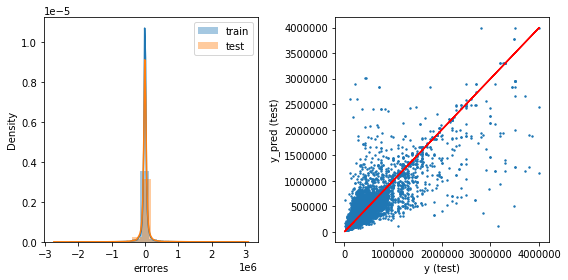

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Vecinos más cercanos']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('error cuadratico medio de Test : ',mean_absolute_error(y_test, y_test_pred))
    print('r2 en Train es : ', r2_score(y_train,y_train_pred, ))
    print('r2 en Test es : ', r2_score(y_test,y_test_pred))

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(y_test, y_test, color = 'red')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    

    
    plt.tight_layout()
    plt.show()
    

In [ ]:
# compute with formulas from the theory
yhat = knn_regressor.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('r cuadrado = ', r_squared,'\n' 'r cuadrado ajustado = ',adjusted_r_squared)

r cuadrado =  0.8040627934213886 
r cuadrado ajustado =  0.8040507004729373


### ***Modelo regresion lineal***

In [ ]:
#Creamos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [ ]:
#entrenamos el modelo KNN

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Evaluamos el modelo***

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578
error cuadratico medio de Test :  97191.46596620386
r2 en Train es :  0.5517887107017188
r2 en Test es :  0.55148643587972
El valor de los coeficientes son :  [ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] 
 El valor del intercepto es : -56646.24807940959


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


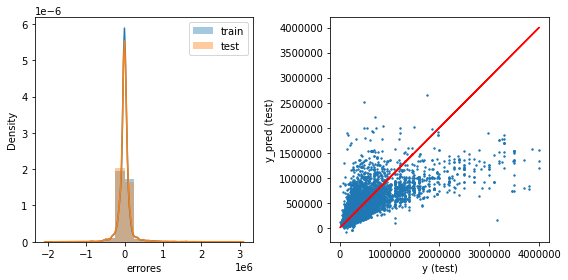

In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal']

for i, model in enumerate([linear_model]):
  #predecimos las etiquetas sobre el conjunto train y test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('error cuadratico medio de Test : ',mean_absolute_error(y_test, y_test_pred))
    print('r2 en Train es : ', r2_score(y_train,y_train_pred, ))
    print('r2 en Test es : ', r2_score(y_test,y_test_pred))

    #obtenemos la pendiente y la ordenada al origen
    print('El valor de los coeficientes son : ', linear_model.coef_, 
          '\n','El valor del intercepto es :',linear_model.intercept_
          )
    


    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    #ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.plot(y, y, color = 'red')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    plt.tight_layout()
    plt.show()

In [ ]:
# compute with formulas from the theory
yhat = linear_model.predict(X)

SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.5516961159355622 0.5516684472969446


# ***Conclusiones***

El mejor modelo de regresion que se ajusta mas a los datos para este probelma es **KNN** (vecino mas cercanos).

Con un hiperparametro, de numero de vecinos k = 5 y sus respectivas metricas, dieron los siguientes resultados:

- El r2 y r2 ajustado es mas alto en el modelo de KNN, siendo los valores mas proximos a 1.
- KNN presenta un menor porcentaje de error cuadratico medio comparado a los modelos de arbol y regresion lineal. 

1. r2 = 0.8040627934213886 
2. r2ajus = 0.8040507004729373
3. Raíz del error cuadrático medio en Train: 121300.24049431273
4. Raíz del error cuadrático medio en Test: 155040.1332898459
5. Error cuadratico medio de Test :  61921.19480786637


**Modelo arbol** : Se utilizo una profundidad de 4 con:

1. Raíz del error cuadrático medio en Train: 178947.60749154066
2. Raíz del error cuadrático medio en Test: 183592.64362839411
3. Error cuadratico medio de Test :  85463.42146236045

El r cuadrado y r cuadrado ajustado se obtuvo lo siguiente.

4.  r2 = 0.6360357207099174 
5. r2ajus = 0.6360132573843222

**Modelo lineal** : El modelo lineal para este caso, es el que menos se ajusta segun los valores encontrados: 

1. Raíz del error cuadrático medio en Train: 199173.83253528475
2. Raíz del error cuadrático medio en Test: 202449.36540361578
3. Error cuadratico medio de Test :  97191.46596620386

El r cuadrado y r cuadrado ajustado se obtuvo lo siguiente:

3. r2 = 0.5516961159355622 
4. r2ajus = 0.5516684472969446


Hay que tener en cuenta lo siguiente para RMSE Y MSE: en todos los casos anteriores, el error cuadratico medio es menor a la raiz cuadratica media. Esto significa que entre los valores testiados y los predichos hay variaciones que son muy pequeñas, mas no se penalizan de igual manera los cambios abruptos. Si el RMSE es mayor que MSE para este caso, es un indicativo de que la mayoria de los datos se encuentran en rangos muy cercanos, que podrian variar en sus decimales.

Para el modelo de KNN, tenemos una confiabilidad de nuestro modelo (r2) de aproximadamente un 80%, el cual supera el porcentaje respecto al modelo de arbol y lineal, siendo el mas bajo un 50%.

###***Mejoras a la metodologia:***
Para mejorar nuestros resultados en la variable de prediccion, lo correcto seria agregar nuevos hiperparametros o parametros que me permitan encontrar los mejores valores para determinar un mejor modelo, por ejemplo se pueden realizar escalado de datos, rellenar valores faltantes,estandarizacion, transformaciones, optimizaciones en los hiperparametros, validacion del modelo para evitar el over-fitting o el underfitting, hacer un mejor procesamiento de datos, los cuales no se llevaron acabo en este spring. 




---

